In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:/PelITS/Data Mining/EAS/framingham.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# IDENTIFIKASI SEBELUM INPUTASI

In [4]:
np.sum(data.isnull())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
x1 = data.loc[data.TenYearCHD==0, 'education']
x1

0       4.0
1       2.0
2       1.0
4       3.0
5       2.0
       ... 
4235    2.0
4236    1.0
4237    2.0
4238    3.0
4239    3.0
Name: education, Length: 3596, dtype: float64

In [6]:
pd.DataFrame(x1.value_counts())

,education
1.0,1397
2.0,1106
3.0,601
4.0,403


In [7]:
x2 = data.loc[data.TenYearCHD==1, 'education']
x2

3       3.0
6       1.0
15      2.0
17      2.0
25      4.0
       ... 
4221    1.0
4223    4.0
4226    1.0
4232    1.0
4233    1.0
Name: education, Length: 644, dtype: float64

In [8]:
pd.DataFrame(x2.value_counts())

,education
1.0,323
2.0,147
3.0,88
4.0,70


Dengan dipisahkan terhadap orang positif CHD dengan yang tidak memiliki karakteristik bahwa modusnya sama yaitu 1 (Some High School).

In [9]:
x3 = data.loc[data.TenYearCHD==0, 'cigsPerDay']

In [10]:
x4 = data.loc[data.TenYearCHD==1, 'cigsPerDay']

In [11]:
pd.DataFrame(data['TenYearCHD'].value_counts())

,TenYearCHD
0,3596
1,644


C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([345.,  40.,  37., 124.,  12.,  46.,  23.,  12.,   1.,   2.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <a list of 10 Patch objects>)

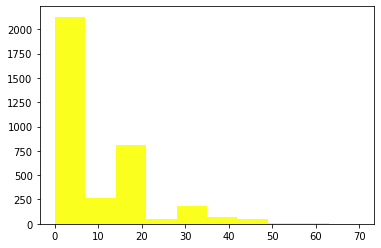

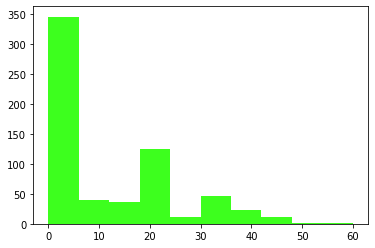

In [12]:
plt.figure()
plt.hist(x3, color='#FBFF1E', label='not CHD')
plt.figure()
plt.hist(x4, color='#3DFF1E', label='CHD' )

Plot terhadap cigarette per day baik positif CHD maupun negatif mengindikasikan bahwa tidak adanya bell shape atau memiliki skewness yang besar. Sehingga dalam melakukan inputasi missing value digunakan nilai median.

In [13]:
x3.skew()

1.2932307896451374

In [14]:
x4.skew()

1.0053485374182052

In [15]:
x3.median()

0.0

In [16]:
x4.median()

2.5

Karena nilai median orang yang positif CHD dengan yang tidak berbeda nilai mediannya. Sehingga input nilai missingnya disesuaikan dengan median orang yang positif CHD dengan yang tidak.

In [17]:
x5 = data.loc[data.TenYearCHD==0, 'BPMeds']
x5

0       0.0
1       0.0
2       0.0
4       0.0
5       0.0
       ... 
4235    NaN
4236    0.0
4237    0.0
4238    0.0
4239    0.0
Name: BPMeds, Length: 3596, dtype: float64

In [18]:
pd.DataFrame(x5.value_counts())

,BPMeds
0.0,3471
1.0,83


In [19]:
x6 = data.loc[data.TenYearCHD==1, 'BPMeds']
x6

3       0.0
6       0.0
15      0.0
17      0.0
25      0.0
       ... 
4221    0.0
4223    1.0
4226    0.0
4232    0.0
4233    0.0
Name: BPMeds, Length: 644, dtype: float64

In [20]:
pd.DataFrame(x6.value_counts())

,BPMeds
0.0,592
1.0,41


Karena BPMeds mengindikasikan baik positif CHD maupun Negatif CHD memiliki modus 0 yaitu not on blood pressure medication sehingga inputasi dilakukan dengan nilai modus yaitu 0.

In [21]:
x7 = data.loc[data.TenYearCHD==0, 'totChol']
x8 = data.loc[data.TenYearCHD==1, 'totChol']

(array([  7., 107., 269., 190.,  51.,   6.,   3.,   1.,   0.,   1.]),
 array([107. , 156.3, 205.6, 254.9, 304.2, 353.5, 402.8, 452.1, 501.4,
        550.7, 600. ]),
 <a list of 10 Patch objects>)

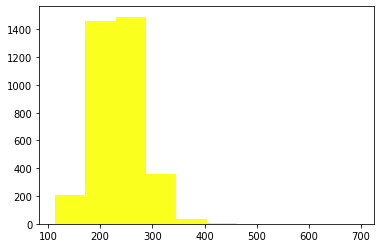

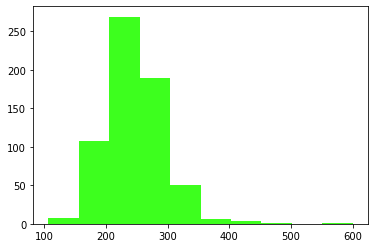

In [22]:
plt.figure()
plt.hist(x7, color='#FBFF1E', label='not CHD')

plt.figure()
plt.hist(x8, color='#3DFF1E', label='CHD' )



In [23]:
import seaborn as sns

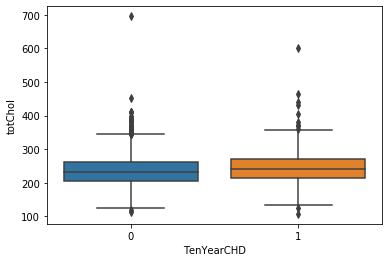

In [24]:
sns.boxplot(x="TenYearCHD" ,y="totChol",data=data)

In [25]:
x7.skew()

0.8013542844158988

In [26]:
x8.skew()

1.1129057611471054

In [27]:
x7.median()

232.0

In [28]:
x8.median()

241.0

Karena nilai skewnessnya cukup besar, dan terdapat data outlier sehingga inputasi missing value dilakukan dengan median dengan dibedakan untuk positif CHD dengan negatif CHD.

In [29]:
x9 = data.loc[data.TenYearCHD==0, 'BMI']
x10 = data.loc[data.TenYearCHD==1, 'BMI']

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 32., 159., 247., 137.,  37.,  16.,   5.,   0.,   0.,   1.]),
 array([15.96 , 20.044, 24.128, 28.212, 32.296, 36.38 , 40.464, 44.548,
        48.632, 52.716, 56.8  ]),
 <a list of 10 Patch objects>)

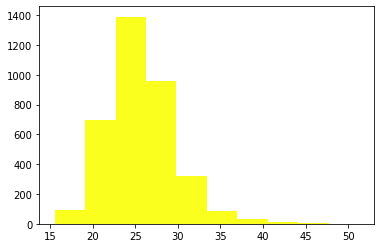

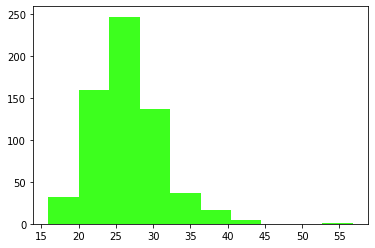

In [30]:
plt.figure()
plt.hist(x9, color='#FBFF1E', label='not CHD')
plt.figure()
plt.hist(x10, color='#3DFF1E', label='CHD' )

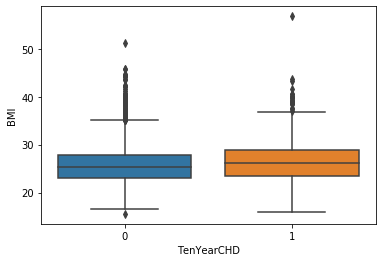

In [31]:
sns.boxplot(x="TenYearCHD" ,y="BMI",data=data)

In [32]:
x9.skew()

0.9289266908235004

In [33]:
x10.skew()

1.102684854907837

In [34]:
x9.median()

25.25

In [35]:
x10.median()

26.155

Untuk variabel BMI nilai skewness nya cukup besar dan terdapat nilai outlier sehingga inputasi dilakukan dengan median berdasarkan kelompok orang positif CHD dengan negatif CHD.

In [36]:
data['heartRate'].index[data['heartRate'].apply(np.isnan)]

Int64Index([689], dtype='int64')

In [37]:
data.iloc[689:690,15:]

,TenYearCHD
689,1


C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 15.,  64., 152., 148., 102.,  83.,  47.,  16.,  12.,   4.]),
 array([ 50.,  57.,  64.,  71.,  78.,  85.,  92.,  99., 106., 113., 120.]),
 <a list of 10 Patch objects>)

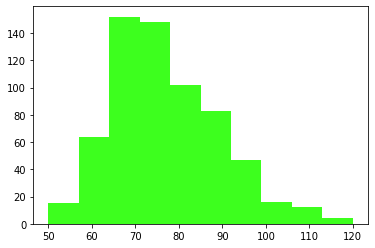

In [38]:
plt.figure()
plt.hist(data.loc[data.TenYearCHD==1, 'heartRate'], color='#3DFF1E' )

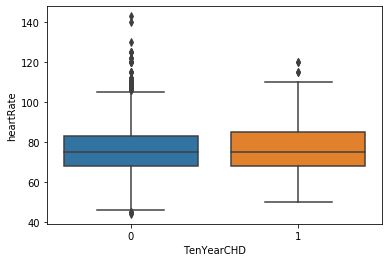

In [39]:
sns.boxplot(x="TenYearCHD" ,y="heartRate",data=data)

In [40]:
data.loc[data.TenYearCHD==1, 'heartRate'].skew()

0.6498400519841738

In [41]:
data.loc[data.TenYearCHD==1, 'heartRate'].median()

75.0

Nilai kosong pada variabel heartrate berada pada data ke 689 saja dan merupakan orang dengan positif CHD. Karekteristik heartrate untuk positif CHD masih memiliki skewness yang cukup besar dan dengan 2 nilai outlier. Sehingga inputasi digunakan nilai median dari heart rate dengan positif CHD.

In [42]:
x11 = data.loc[data.TenYearCHD==0, 'glucose']
x12 = data.loc[data.TenYearCHD==1, 'glucose']

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([224., 315.,  27.,   7.,   6.,   2.,   5.,   3.,   2.,   3.]),
 array([ 40. ,  75.4, 110.8, 146.2, 181.6, 217. , 252.4, 287.8, 323.2,
        358.6, 394. ]),
 <a list of 10 Patch objects>)

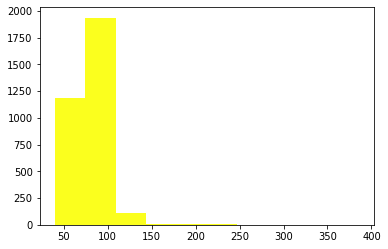

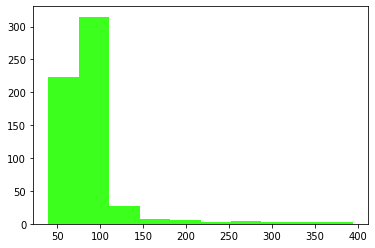

In [43]:
plt.figure()
plt.hist(x11, color='#FBFF1E', label='not CHD')
plt.figure()
plt.hist(x12, color='#3DFF1E', label='CHD' )

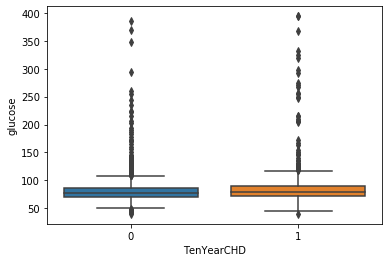

In [44]:
sns.boxplot(x="TenYearCHD" ,y="glucose",data=data)

In [45]:
x11.skew()

5.811357000592983

In [46]:
x12.skew()

4.444742956008934

In [47]:
x11.median()

78.0

In [48]:
x12.median()

79.0

Karena glucose dari orang positif CHD dan negatif CHD keduanya memiliki sebaran data yang tidak bell shape dilihat dari histogram dan nilai skewness nya. Serta memiliki banyak outlier. Sehingga inputasi missing value dilakukan dengan nilai median dari yang positif CHD dan median orang yang negatif CHD.

# INPUTASI MISSING VALUE

In [49]:
data['education'] = data['education'].fillna(data['education'].mode()[0])

In [50]:
data.loc[data['TenYearCHD']==0,'cigsPerDay']=data.loc[data['TenYearCHD']==0,'cigsPerDay'].fillna(data.loc[data['TenYearCHD']==0,'cigsPerDay'].median())
data.loc[data['TenYearCHD']==1,'cigsPerDay']=data.loc[data['TenYearCHD']==1,'cigsPerDay'].fillna(data.loc[data['TenYearCHD']==1,'cigsPerDay'].median())

In [51]:
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])

In [52]:
data.loc[data['TenYearCHD']==0,'totChol']=data.loc[data['TenYearCHD']==0,'totChol'].fillna(data.loc[data['TenYearCHD']==0,'totChol'].median())
data.loc[data['TenYearCHD']==1,'totChol']=data.loc[data['TenYearCHD']==1,'totChol'].fillna(data.loc[data['TenYearCHD']==1,'totChol'].median())

In [53]:
data.loc[data['TenYearCHD']==0,'BMI']=data.loc[data['TenYearCHD']==0,'BMI'].fillna(data.loc[data['TenYearCHD']==0,'BMI'].median())
data.loc[data['TenYearCHD']==1,'BMI']=data.loc[data['TenYearCHD']==1,'BMI'].fillna(data.loc[data['TenYearCHD']==1,'BMI'].median())

In [54]:
data.loc[data['TenYearCHD']==1,'heartRate']=data.loc[data['TenYearCHD']==1,'heartRate'].fillna(data.loc[data['TenYearCHD']==1,'heartRate'].median())

In [55]:
data.loc[data['TenYearCHD']==0,'glucose']=data.loc[data['TenYearCHD']==0,'glucose'].fillna(data.loc[data['TenYearCHD']==0,'glucose'].median())
data.loc[data['TenYearCHD']==1,'glucose']=data.loc[data['TenYearCHD']==1,'glucose'].fillna(data.loc[data['TenYearCHD']==1,'glucose'].median())

In [56]:
np.sum(data.isnull())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [57]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,8.945519,0.029245,0.005896,0.310613,0.025708,236.663208,132.354599,82.897759,25.800467,75.878774,81.612736,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.904015,0.168513,0.076569,0.462799,0.158280,44.330359,22.033300,11.910394,4.070802,12.023937,22.858737,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


CEK OUTLIER var age, cigsperday, sysBP, DiaBP

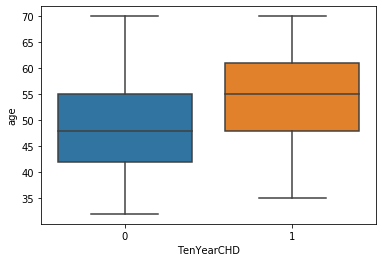

In [58]:
sns.boxplot(x="TenYearCHD" ,y="age",data=data)

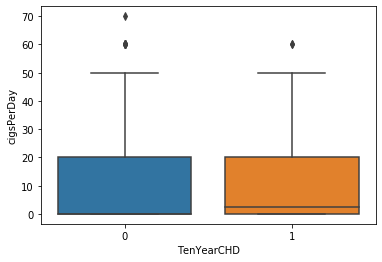

In [59]:
sns.boxplot(x="TenYearCHD" ,y="cigsPerDay",data=data)

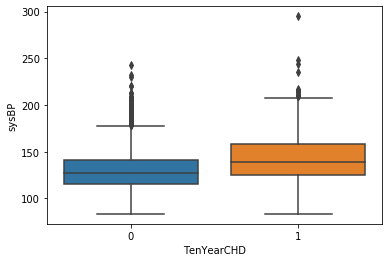

In [60]:
sns.boxplot(x="TenYearCHD" ,y="sysBP",data=data)

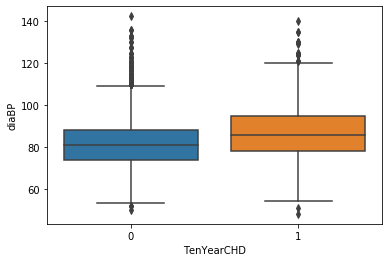

In [61]:
sns.boxplot(x="TenYearCHD" ,y="diaBP",data=data)

# Visualisasi Data

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Gender

In [63]:
pd.DataFrame(data['male'].value_counts())

,male
0,2420
1,1820


In [64]:
posg=pd.DataFrame(data.loc[data['TenYearCHD']==1,'male'].value_counts())
posg

,male
1,343
0,301


In [65]:
posg['gender'] = np.where(posg.index == 0, "Female", "Male")
posg

,male,gender
1,343,Male
0,301,Female


([<matplotlib.patches.Wedge at 0x261a8107f88>,
 [Text(-0.13498864453234113, 1.3130796113896983, 'Male'),
  Text(0.13498864453234125, -1.3130796113896983, 'Female')],
 [Text(-0.07363016974491333, 0.716225242576199, '53.3%'),
  Text(0.0736301697449134, -0.716225242576199, '46.7%')])

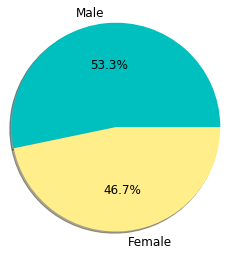

In [66]:
plt.figure()
plt.pie(posg.male,labels=posg.gender,autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('c','#ffee89'),textprops=dict(size=12,color='k'))

In [67]:
negg=pd.DataFrame(data.loc[data['TenYearCHD']==0,'male'].value_counts())
negg

,male
0,2119
1,1477


In [68]:
negg['gender'] = np.where(negg.index == 0, "Female", "Male")
negg

,male,gender
0,2119,Female
1,1477,Male


([<matplotlib.patches.Wedge at 0x261a816e208>,
 [Text(-0.3653436124217615, 1.268433697464167, 'Female'),
  Text(0.36534349366242563, -1.2684337316700993, 'Male')],
 [Text(-0.19927833404823353, 0.6918729258895455, '58.9%'),
  Text(0.19927826927041395, -0.6918729445473268, '41.1%')])

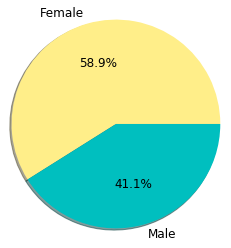

In [69]:
plt.figure()
plt.pie(negg.male,labels=negg.gender,autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('#ffee89','c'),textprops=dict(size=12,color='k'))

Education

In [70]:
pose=pd.DataFrame(data.loc[data['TenYearCHD']==1,'education'].value_counts())
pose

,education
1.0,339
2.0,147
3.0,88
4.0,70


In [71]:
edu=[]

for row in pose.index:
        if row == 1:    edu.append('Some High School')
        elif row == 2:  edu.append('High School or GED')
        elif row == 3:  edu.append('Some College or Vacational School')
        elif row == 4:  edu.append('College')
        else:           edu.append('0')

pose['edu']=edu
pose

,education,edu
1.0,339,Some High School
2.0,147,High School or GED
3.0,88,Some College or Vacational School
4.0,70,College


In [72]:
pose['CHD']=[1,1,1,1]
pose

,education,edu,CHD
1.0,339,Some High School,1
2.0,147,High School or GED,1
3.0,88,Some College or Vacational School,1
4.0,70,College,1


In [73]:
nege=pd.DataFrame(data.loc[data['TenYearCHD']==0,'education'].value_counts())
nege

,education
1.0,1486
2.0,1106
3.0,601
4.0,403


In [74]:
edu=[]

for row in nege.index:
        if row == 1:    edu.append('Some High School')
        elif row == 2:  edu.append('High School or GED')
        elif row == 3:  edu.append('Some College or Vacational School')
        elif row == 4:  edu.append('College')
        else:           edu.append('0')

nege['edu']=edu
nege

,education,edu
1.0,1486,Some High School
2.0,1106,High School or GED
3.0,601,Some College or Vacational School
4.0,403,College


In [75]:
nege['CHD']=[0,0,0,0]
nege

,education,edu,CHD
1.0,1486,Some High School,0
2.0,1106,High School or GED,0
3.0,601,Some College or Vacational School,0
4.0,403,College,0


In [76]:
posnege=pd.concat([pose,nege])
posnege

,education,edu,CHD
1.0,339,Some High School,1
2.0,147,High School or GED,1
3.0,88,Some College or Vacational School,1
4.0,70,College,1
1.0,1486,Some High School,0
2.0,1106,High School or GED,0
3.0,601,Some College or Vacational School,0
4.0,403,College,0


C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2897: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


Text(0, 0.5, 'education')

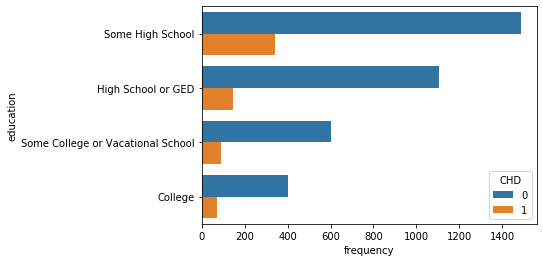

In [77]:
plt.figure()
ax=sns.barplot(x="education",y='edu',hue='CHD',data=posnege,orient="h")
plt.xlabel("frequency")
plt.ylabel("education")

([<matplotlib.patches.Wedge at 0x261a7dfa848>,
 [Text(-0.10934252920935293, 1.3154634967592609, 'Some High School'),
  Text(-0.8380210987087299, -1.0198630487075278, 'High School or GED'),
  Text(0.584302391572396, -1.183634536165103, 'Some College or Vacational School'),
  Text(1.2437844428387081, -0.4420410159164016, 'College')],
 [Text(-0.05964137956873796, 0.7175255436868695, '52.6%'),
  Text(-0.457102417477489, -0.5562889356586515, '22.8%'),
  Text(0.3187103954031251, -0.6456188379082379, '13.7%'),
  Text(0.6784278779120225, -0.2411132814089463, '10.9%')])

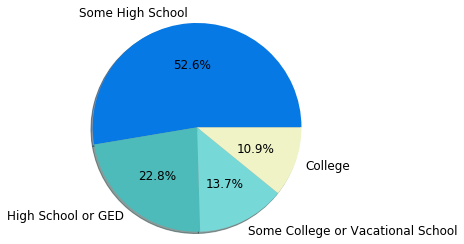

In [78]:
plt.figure()
plt.pie(pose.education,labels=pose['edu'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('#0779e4','#4cbbb9','#77d8d8','#eff3c6'),textprops=dict(size=12,color='k'))

([<matplotlib.patches.Wedge at 0x261a5b24348>,
 [Text(0.3553592510917727, 1.2712670068335348, 'Some High School'),
  Text(-1.2046888423510616, -0.5395598142141974, 'High School or GED'),
  Text(0.4421827054150715, -1.2437340772977994, 'Some College or Vacational School'),
  Text(1.239030054112799, -0.45519723747539875, 'College')],
 [Text(0.19383231877733054, 0.6934183673637462, '41.3%'),
  Text(-0.6571030049187608, -0.29430535320774404, '30.8%'),
  Text(0.24119056659003899, -0.6784004057987996, '16.7%'),
  Text(0.6758345749706176, -0.2482894022593084, '11.2%')])

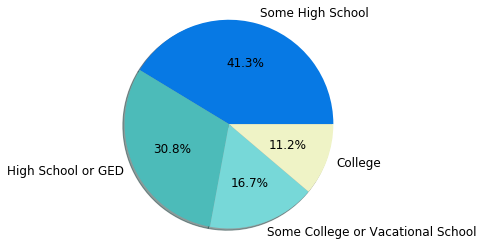

In [79]:
plt.figure()
plt.pie(nege.education,labels=nege['edu'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('#0779e4','#4cbbb9','#77d8d8','#eff3c6'),textprops=dict(size=12,color='k'))

Current Smoker

In [80]:
poss=pd.DataFrame(data.loc[data['TenYearCHD']==1,'currentSmoker'].value_counts())
poss

,currentSmoker
1,333
0,311


In [81]:
poss['info'] = np.where(poss.index == 0, "nonsmoker", "smoker")
poss

,currentSmoker,info
1,333,smoker
0,311,nonsmoker


([<matplotlib.patches.Wedge at 0x261a92bf3c8>,
 [Text(-0.0707981064453479, 1.3181000068749538, 'smoker'),
  Text(0.07079798303591807, -1.3181000135035452, 'nonsmoker')],
 [Text(-0.03861714897018976, 0.7189636401136111, '51.7%'),
  Text(0.03861708165595531, -0.7189636437292064, '48.3%')])

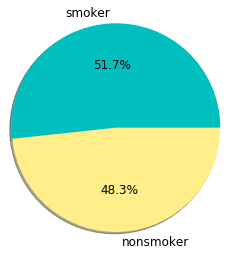

In [82]:
plt.figure()
plt.pie(poss.currentSmoker,labels=poss['info'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('c','#ffee89'),textprops=dict(size=12,color='k'))

In [83]:
negs=pd.DataFrame(data.loc[data['TenYearCHD']==0,'currentSmoker'].value_counts())
negs

,currentSmoker
0,1834
1,1762


In [84]:
negs['info'] = np.where(negs.index == 0, "nonsmoker", "smoker")
negs

,currentSmoker,info
0,1834,nonsmoker
1,1762,smoker


([<matplotlib.patches.Wedge at 0x261a93140c8>,
 [Text(-0.04150836127915026, 1.3193472082601758, 'nonsmoker'),
  Text(0.041508361279150384, -1.3193472082601758, 'smoker')],
 [Text(-0.022640924334081956, 0.7196439317782777, '51.0%'),
  Text(0.022640924334082026, -0.7196439317782777, '49.0%')])

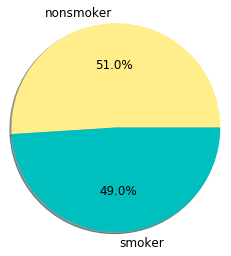

In [85]:
plt.figure()
plt.pie(negs.currentSmoker,labels=negs['info'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('#ffee89','c'),textprops=dict(size=12,color='k'))

ciggarets per Day

Text(0.5, 0, 'cigsperday')

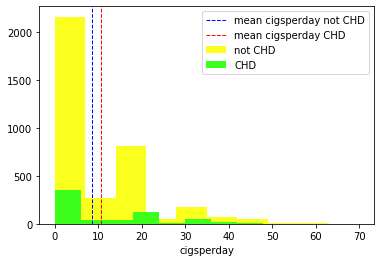

In [86]:
plt.figure()
plt.axvline(x=data.loc[data.TenYearCHD==0, 'cigsPerDay'].mean(), color='b', linestyle='dashed', linewidth=1, label="mean cigsperday not CHD")
plt.axvline(x=data.loc[data.TenYearCHD==1, 'cigsPerDay'].mean(), color='r', linestyle='dashed', linewidth=1, label="mean cigsperday CHD")
plt.hist(data.loc[data.TenYearCHD==0, 'cigsPerDay'],bins=10, color='#FBFF1E', label='not CHD')
plt.hist(data.loc[data.TenYearCHD==1, 'cigsPerDay'],bins=10, color='#3DFF1E', label='CHD' )
plt.legend()
plt.xlabel("cigsperday")

Blood Pressure Medications

In [87]:
posb=pd.DataFrame(data.loc[data['TenYearCHD']==1,'BPMeds'].value_counts())
posb

,BPMeds
0.0,603
1.0,41


In [88]:
posb['info'] = np.where(posb.index == 0, "Not on BPM", "on BPM")
posb

,BPMeds,info
0.0,603,Not on BPM
1.0,41,on BPM


([<matplotlib.patches.Wedge at 0x261a9413d48>,
 [Text(-1.293685709425215, 0.26225423777124846, 'Not on BPM'),
  Text(1.2936856910097014, -0.2622543286139459, 'on BPM')],
 [Text(-0.7056467505955717, 0.1430477660570446, '93.6%'),
  Text(0.7056467405507462, -0.14304781560760682, '6.4%')])

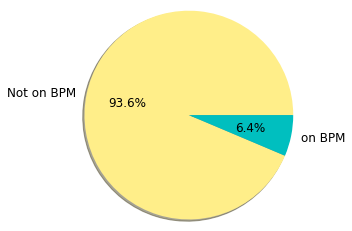

In [89]:
plt.figure()
plt.pie(posb.BPMeds,labels=posb['info'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('#ffee89','c'),textprops=dict(size=12,color='k'))

In [90]:
negb=pd.DataFrame(data.loc[data['TenYearCHD']==0,'BPMeds'].value_counts())
negb

,BPMeds
0.0,3513
1.0,83


In [91]:
negb['info'] = np.where(negb.index == 0, "Not on BPM", "on BPM")
negb

,BPMeds,info
0.0,3513,Not on BPM
1.0,83,on BPM


([<matplotlib.patches.Wedge at 0x261a946f348>,
 [Text(-1.3165312777487597, 0.09563155707829026, 'Not on BPM'),
  Text(1.3165312833448028, -0.09563148003919353, 'on BPM')],
 [Text(-0.7181079696811415, 0.05216266749724923, '97.7%'),
  Text(0.7181079727335288, -0.05216262547592374, '2.3%')])

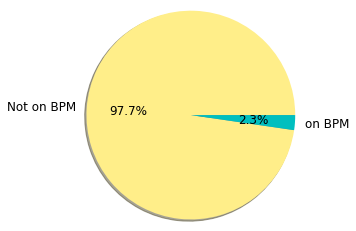

In [92]:
plt.figure()
plt.pie(negb.BPMeds,labels=negb['info'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('#ffee89','c'),textprops=dict(size=12,color='k'))

Prevalent Stroke

In [93]:
posps=pd.DataFrame(data.loc[data['TenYearCHD']==1,'prevalentStroke'].value_counts())
posps

,prevalentStroke
0,633
1,11


In [94]:
posps['info'] = np.where(posps.index == 0, "Not Prevalent Stroke", "Prevalent Stroke")
posps

,prevalentStroke,info
0,633,Not Prevalent Stroke
1,11,Prevalent Stroke


([<matplotlib.patches.Wedge at 0x261a94bbbc8>,
 [Text(-1.3181000068749538, 0.07079810644534842, 'Not Prevalent Stroke'),
  Text(1.3181000114321115, -0.07079802160136589, 'Prevalent Stroke')],
 [Text(-0.7189636401136111, 0.03861714897019005, '98.3%'),
  Text(0.7189636425993335, -0.038617102691654116, '1.7%')])

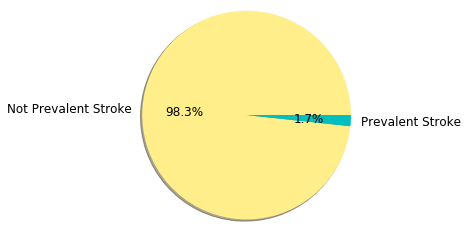

In [95]:
plt.figure()
plt.pie(posps.prevalentStroke,labels=posps['info'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('#ffee89','c'),textprops=dict(size=12,color='k'))

In [96]:
negps=pd.DataFrame(data.loc[data['TenYearCHD']==0,'prevalentStroke'].value_counts())
negps

,prevalentStroke
0,3582
1,14


In [97]:
negps['info'] = np.where(negps.index == 0, "Not Prevalent Stroke", "Prevalent Stroke")
negps

,prevalentStroke,info
0,3582,Not Prevalent Stroke
1,14,Prevalent Stroke


([<matplotlib.patches.Wedge at 0x261a9512848>,
 [Text(-1.3199012695914891, 0.016144303353659205, 'Not Prevalent Stroke'),
  Text(1.319901270512581, -0.01614422804826996, 'Prevalent Stroke')],
 [Text(-0.7199461470499031, 0.008805983647450475, '99.6%'),
  Text(0.7199461475523169, -0.008805942571783614, '0.4%')])

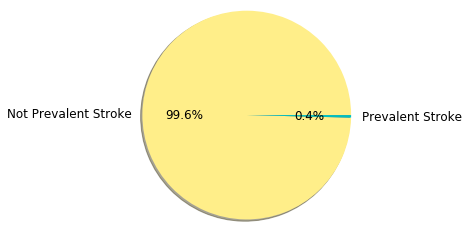

In [98]:
plt.figure()
plt.pie(negps.prevalentStroke,labels=negps['info'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('#ffee89','c'),textprops=dict(size=12,color='k'))

Prevalent Hyp

In [99]:
posph=pd.DataFrame(data.loc[data['TenYearCHD']==1,'prevalentHyp'].value_counts())
posph

,prevalentHyp
1,325
0,319


In [100]:
posph['info'] = np.where(posph.index == 0, "Not Prevalent Hypertensive", "Prevalent Hypertensive")
posph

,prevalentHyp,info
1,325,Prevalent Hypertensive
0,319,Not Prevalent Hypertensive


([<matplotlib.patches.Wedge at 0x261a9567508>,
 [Text(-0.01931724431563976, 1.3198586454889971, 'Prevalent Hypertensive'),
  Text(0.0193173678897245, -1.3198586436803803, 'Not Prevalent Hypertensive')],
 [Text(-0.010536678717621687, 0.7199228975394528, '50.5%'),
  Text(0.01053674612166791, -0.7199228965529346, '49.5%')])

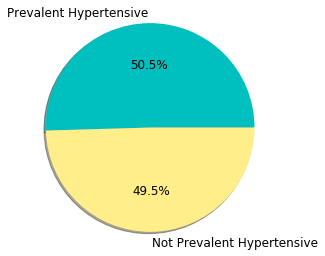

In [101]:
plt.figure()
plt.pie(posph.prevalentHyp,labels=posph['info'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('c','#ffee89'),textprops=dict(size=12,color='k'))

In [102]:
negph=pd.DataFrame(data.loc[data['TenYearCHD']==0,'prevalentHyp'].value_counts())
negph

,prevalentHyp
0,2604
1,992


In [103]:
negph['info'] = np.where(negph.index == 0, "Not Prevalent Hypertensive", "Prevalent Hypertensive")
negph

,prevalentHyp,info
0,2604,Not Prevalent Hypertensive
1,992,Prevalent Hypertensive


([<matplotlib.patches.Wedge at 0x261a95bc6c8>,
 [Text(-0.8545498049664975, 1.0060539900182899, 'Not Prevalent Hypertensive'),
  Text(0.8545497107729212, -1.0060540700270124, 'Prevalent Hypertensive')],
 [Text(-0.46611807543627126, 0.548756721828158, '72.4%'),
  Text(0.466118024057957, -0.5487567654692795, '27.6%')])

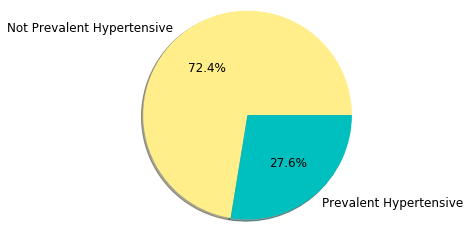

In [104]:
plt.figure()
plt.pie(negph.prevalentHyp,labels=negph['info'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('#ffee89','c'),textprops=dict(size=12,color='k'))

Diabetes

In [105]:
posdb=pd.DataFrame(data.loc[data['TenYearCHD']==1,'diabetes'].value_counts())
posdb

,diabetes
0,604
1,40


In [106]:
posdb['info'] = np.where(posdb.index == 0, "Not Diabetes", "Diabetes")
posdb

,diabetes,info
0,604,Not Diabetes
1,40,Diabetes


([<matplotlib.patches.Wedge at 0x261a9612088>,
 [Text(-1.294949673092857, 0.25594011830251145, 'Not Diabetes'),
  Text(1.2949496790835673, -0.25594008799202667, 'Diabetes')],
 [Text(-0.7063361853233764, 0.13960370089227897, '93.8%'),
  Text(0.7063361885910366, -0.13960368435928724, '6.2%')])

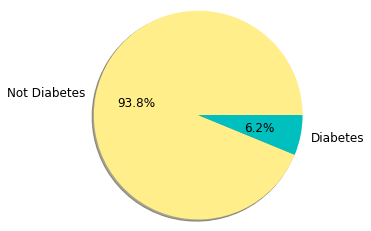

In [107]:
plt.figure()
plt.pie(posdb.diabetes,labels=posdb['info'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('#ffee89','c'),textprops=dict(size=12,color='k'))

In [108]:
negdb=pd.DataFrame(data.loc[data['TenYearCHD']==0,'diabetes'].value_counts())
negdb

,diabetes
0,3527
1,69


In [109]:
negdb['info'] = np.where(negdb.index == 0, "Not Diabetes", "Diabetes")
negdb

,diabetes,info
0,3527,Not Diabetes
1,69,Diabetes


([<matplotlib.patches.Wedge at 0x261a965ce08>,
 [Text(-1.3176024316857182, 0.0795225252106742, 'Not Diabetes'),
  Text(1.3176024316857182, -0.07952252521067436, 'Diabetes')],
 [Text(-0.7186922354649372, 0.04337592284218592, '98.1%'),
  Text(0.7186922354649372, -0.04337592284218601, '1.9%')])

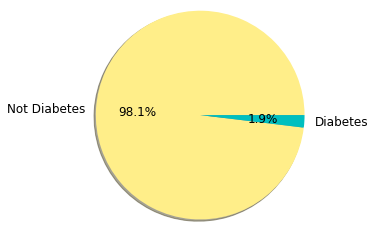

In [110]:
plt.figure()
plt.pie(negdb.diabetes,labels=negdb['info'],autopct='%1.1f%%',shadow=True,
        radius=1.2,colors=('#ffee89','c'),textprops=dict(size=12,color='k'))

total Cholesterol

Text(0.5, 0, 'totChol')

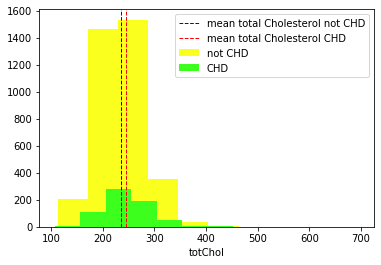

In [111]:
plt.figure()
plt.axvline(x=data.loc[data.TenYearCHD==0, 'totChol'].mean(), color='b', linestyle='dashed', linewidth=1, label="mean total Cholesterol not CHD")
plt.axvline(x=data.loc[data.TenYearCHD==1, 'totChol'].mean(), color='r', linestyle='dashed', linewidth=1, label="mean total Cholesterol CHD")
plt.hist(data.loc[data.TenYearCHD==0, 'totChol'],bins=10, color='#FBFF1E', label='not CHD')
plt.hist(data.loc[data.TenYearCHD==1, 'totChol'],bins=10, color='#3DFF1E', label='CHD' )
plt.legend()
plt.xlabel("totChol")

SysBP

Text(0.5, 0, 'sysBP')

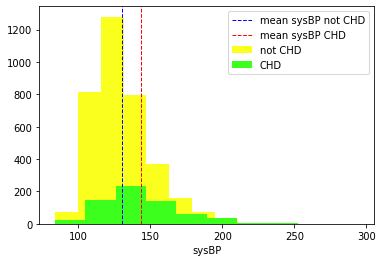

In [112]:
plt.figure()
plt.axvline(x=data.loc[data.TenYearCHD==0, 'sysBP'].mean(), color='b', linestyle='dashed', linewidth=1, label="mean sysBP not CHD")
plt.axvline(x=data.loc[data.TenYearCHD==1, 'sysBP'].mean(), color='r', linestyle='dashed', linewidth=1, label="mean sysBP CHD")
plt.hist(data.loc[data.TenYearCHD==0, 'sysBP'],bins=10, color='#FBFF1E', label='not CHD')
plt.hist(data.loc[data.TenYearCHD==1, 'sysBP'],bins=10, color='#3DFF1E', label='CHD' )
plt.legend()
plt.xlabel("sysBP")

diaBP

Text(0.5, 0, 'diaBP')

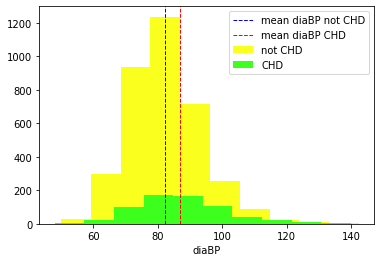

In [113]:
plt.figure()
plt.axvline(x=data.loc[data.TenYearCHD==0, 'diaBP'].mean(), color='b', linestyle='dashed', linewidth=1, label="mean diaBP not CHD")
plt.axvline(x=data.loc[data.TenYearCHD==1, 'diaBP'].mean(), color='r', linestyle='dashed', linewidth=1, label="mean diaBP CHD")
plt.hist(data.loc[data.TenYearCHD==0, 'diaBP'],bins=10, color='#FBFF1E', label='not CHD')
plt.hist(data.loc[data.TenYearCHD==1, 'diaBP'],bins=10, color='#3DFF1E', label='CHD' )
plt.legend()
plt.xlabel("diaBP")

BMI

Text(0.5, 0, 'BMI')

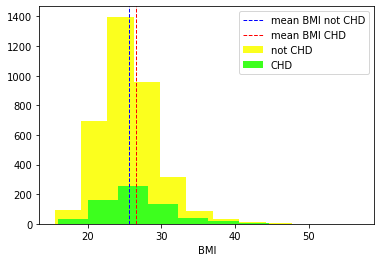

In [114]:
plt.figure()
plt.axvline(x=data.loc[data.TenYearCHD==0, 'BMI'].mean(), color='b', linestyle='dashed', linewidth=1, label="mean BMI not CHD")
plt.axvline(x=data.loc[data.TenYearCHD==1, 'BMI'].mean(), color='r', linestyle='dashed', linewidth=1, label="mean BMI CHD")
plt.hist(data.loc[data.TenYearCHD==0, 'BMI'],bins=10, color='#FBFF1E', label='not CHD')
plt.hist(data.loc[data.TenYearCHD==1, 'BMI'],bins=10, color='#3DFF1E', label='CHD' )
plt.legend()
plt.xlabel("BMI")

HeartRate

Text(0.5, 0, 'heartRate')

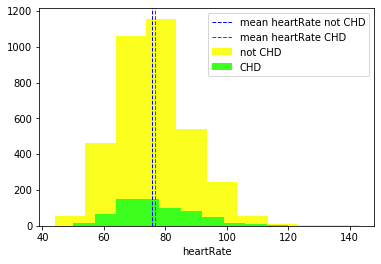

In [115]:
plt.figure()
plt.axvline(x=data.loc[data.TenYearCHD==0, 'heartRate'].mean(), color='b', linestyle='dashed', linewidth=1, label="mean heartRate not CHD")
plt.axvline(x=data.loc[data.TenYearCHD==1, 'heartRate'].mean(), color='r', linestyle='dashed', linewidth=1, label="mean heartRate CHD")
plt.hist(data.loc[data.TenYearCHD==0, 'heartRate'],bins=10, color='#FBFF1E', label='not CHD')
plt.hist(data.loc[data.TenYearCHD==1, 'heartRate'],bins=10, color='#3DFF1E', label='CHD' )
plt.legend()
plt.xlabel("heartRate")

Glucose

Text(0.5, 0, 'glucose')

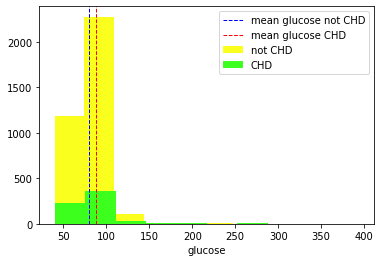

In [116]:
plt.figure()
plt.axvline(x=data.loc[data.TenYearCHD==0, 'glucose'].mean(), color='b', linestyle='dashed', linewidth=1, label="mean glucose not CHD")
plt.axvline(x=data.loc[data.TenYearCHD==1, 'glucose'].mean(), color='r', linestyle='dashed', linewidth=1, label="mean glucose CHD")
plt.hist(data.loc[data.TenYearCHD==0, 'glucose'],bins=10, color='#FBFF1E', label='not CHD')
plt.hist(data.loc[data.TenYearCHD==1, 'glucose'],bins=10, color='#3DFF1E', label='CHD' )
plt.legend()
plt.xlabel("glucose")

TenYearCHD

In [117]:
barchd=pd.DataFrame(data['TenYearCHD'].value_counts())
barchd['info'] = np.where(barchd.index == 0, "Not CHD", "CHD")
barchd

,TenYearCHD,info
0,3596,Not CHD
1,644,CHD


Text(0, 0.5, '')

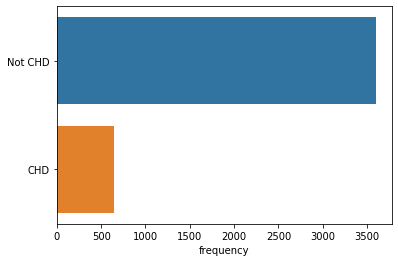

In [118]:
sns.barplot(barchd.TenYearCHD,barchd['info'])
plt.xlabel('frequency')
plt.ylabel('')

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


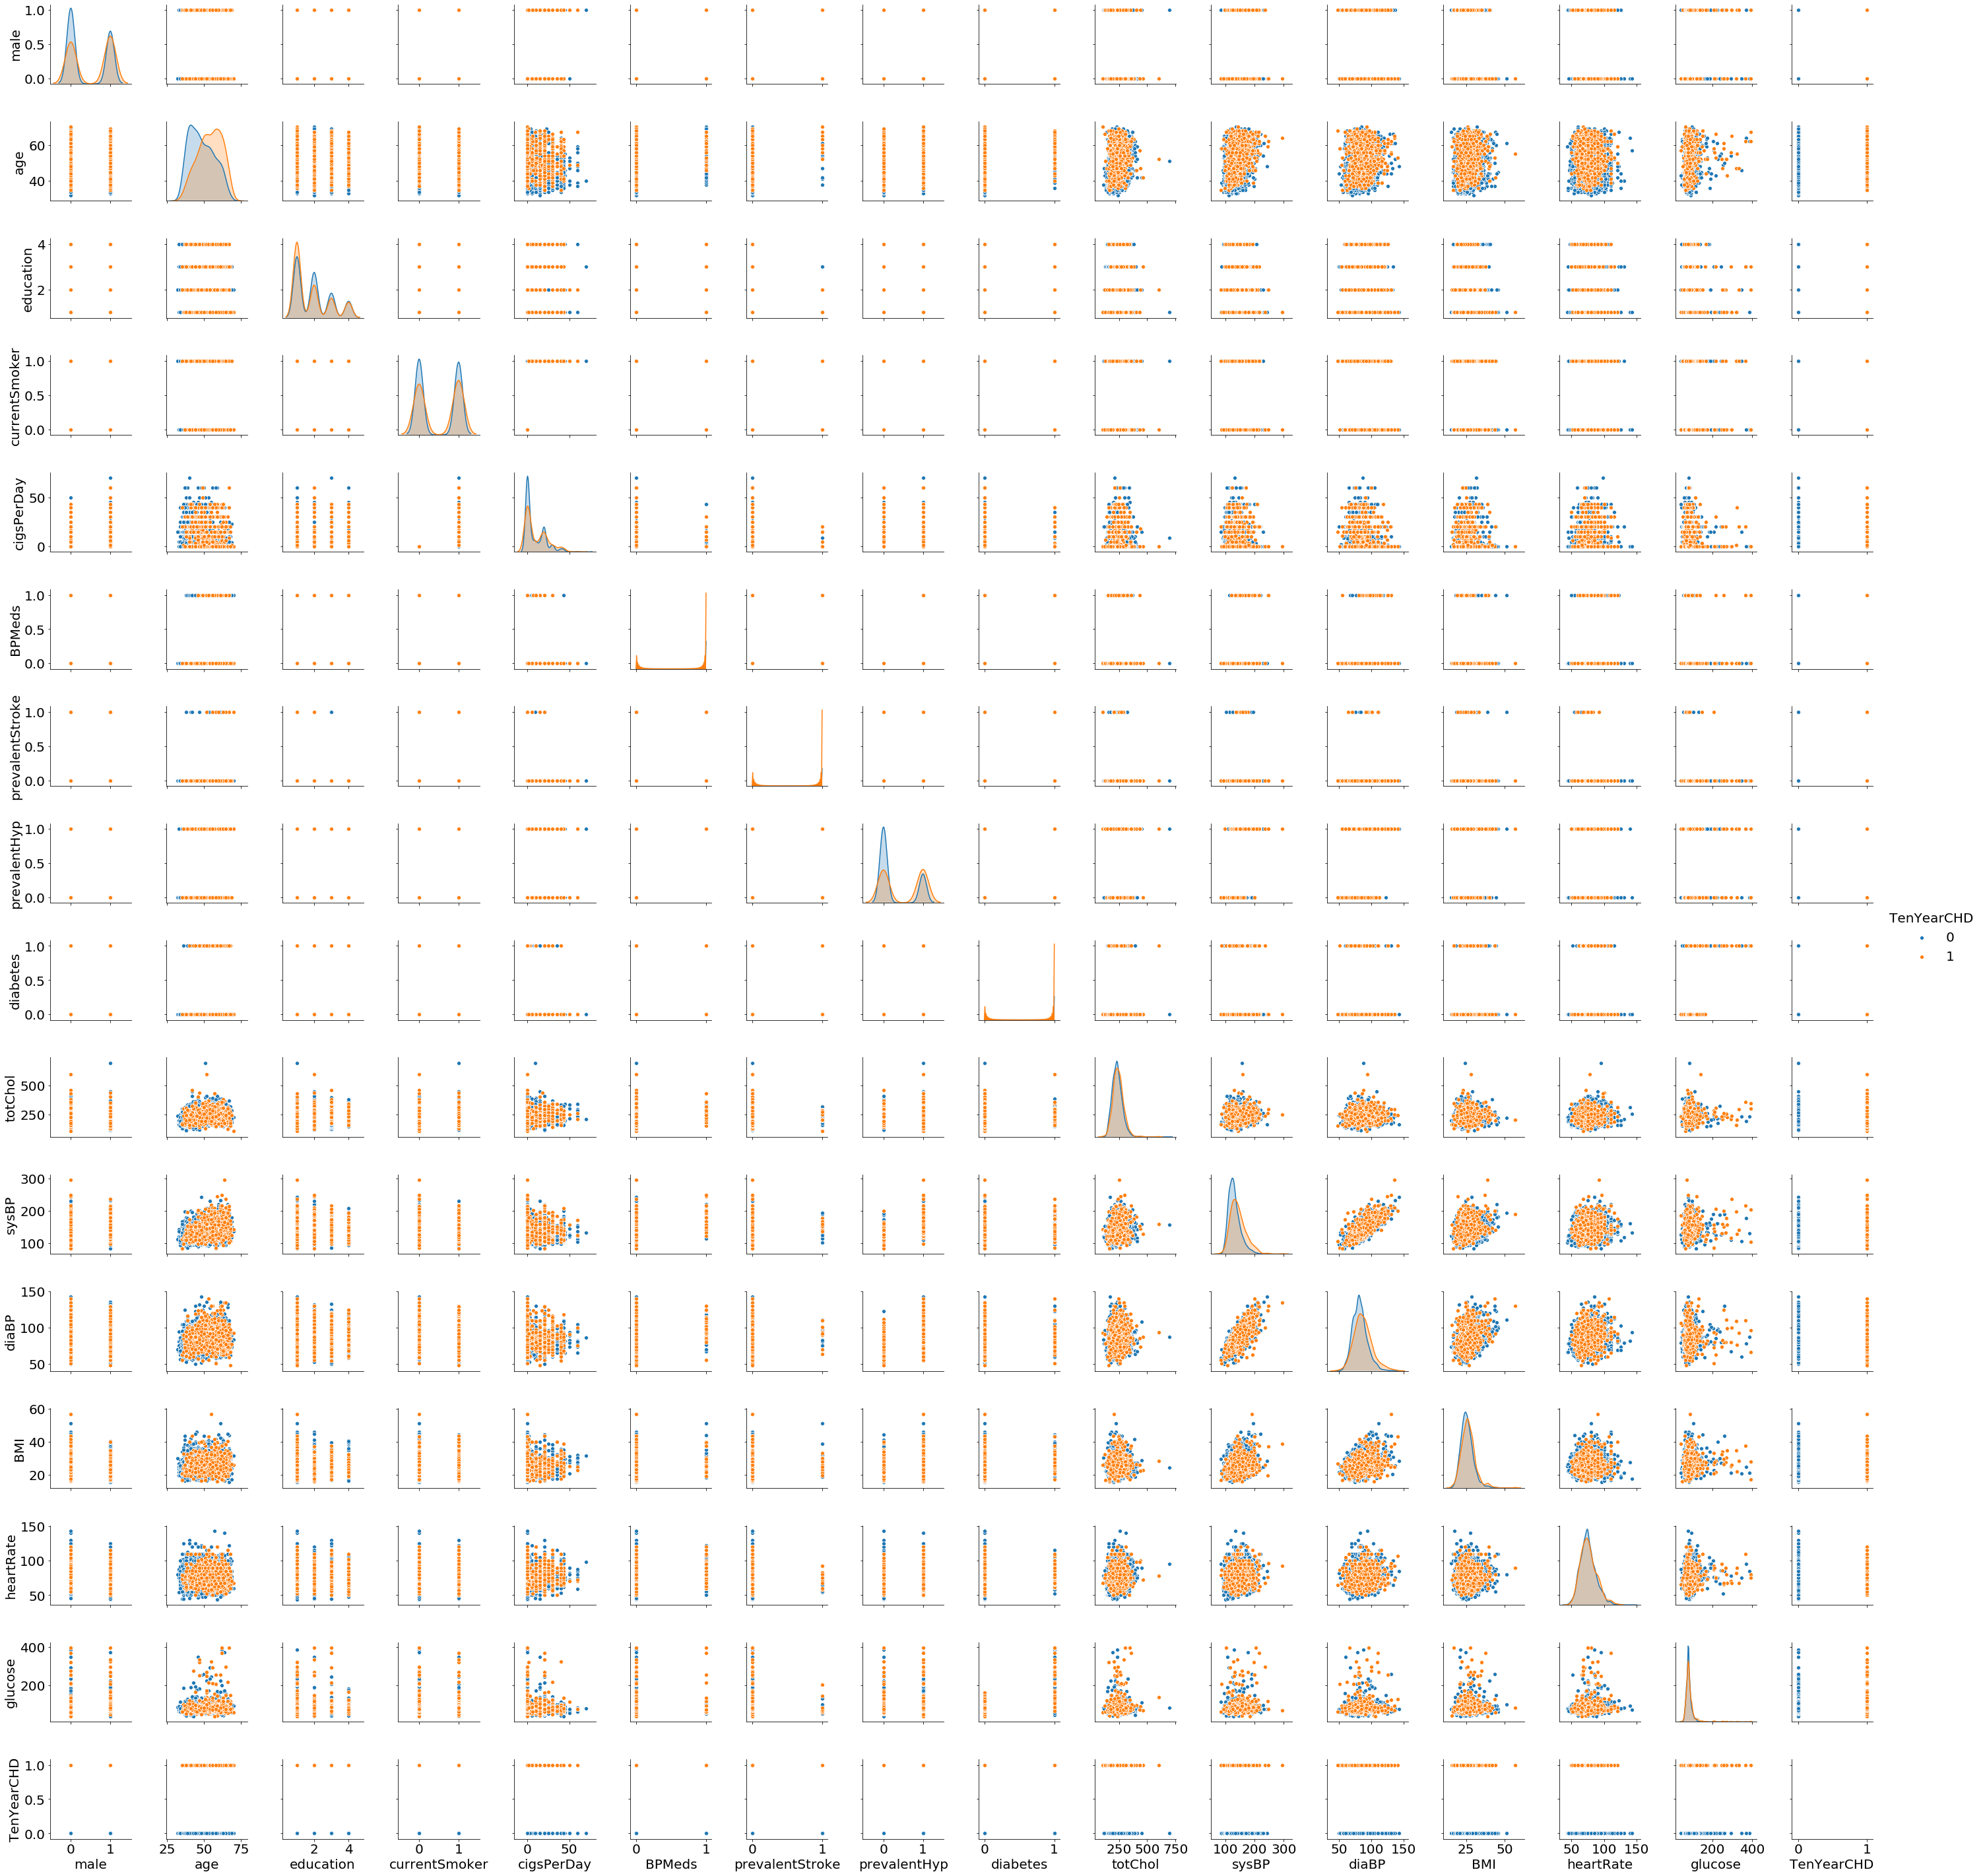

In [119]:
ax=sns.set_context(rc={'font.size':20})
ax=sns.pairplot(data,hue='TenYearCHD')
plt.show()

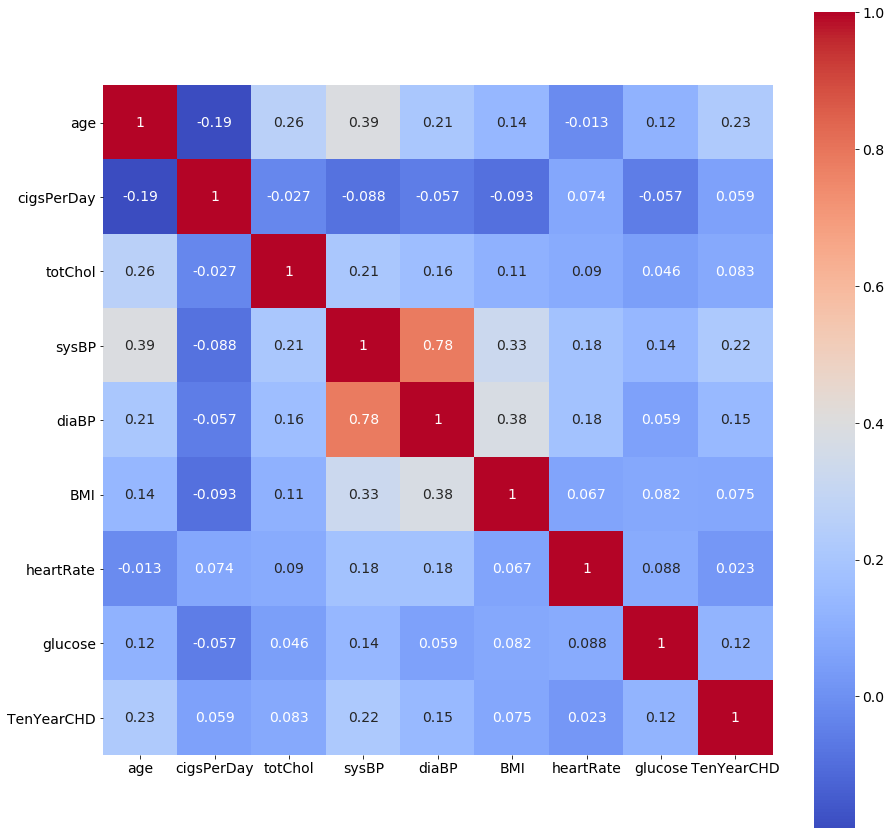

In [120]:
df_temp=data.iloc[:,[1,4,9,10,11,12,13,14,15]]
u=df_temp.corr()
ax=sns.set_context(rc={'font.size':14})
ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(u,annot=True,square=True,cmap='coolwarm')
plt.show()

# Under sampling for balancing target variable

In [121]:
shuffled_df = data.sample(frac=1,random_state=4)

In [122]:
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

In [123]:
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

In [124]:
data_bal = pd.concat([CHD_df, non_CHD_df])

In [125]:
data_bal.TenYearCHD.value_counts()

1    644
0    611
Name: TenYearCHD, dtype: int64

In [126]:
data_bal.reset_index(inplace = True, drop = True)

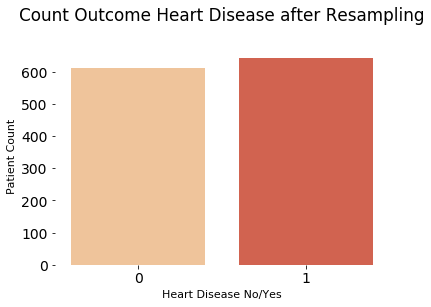

In [127]:
sns.countplot(data_bal.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

## PCA

In [128]:
from sklearn.decomposition import PCA

In [129]:
PCAdf=data_bal.iloc[:,[1,4,9,10,11,12,13,14]]

In [130]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(PCAdf)

In [131]:
cov_m=np.cov(X_std.T)

eig_val, eig_vec=np.linalg.eig(cov_m)

print('\neigenvalues\n%s'%eig_val)
print('\neigenvectors\n%s'%eig_vec)


eigenvalues
[2.38158706 0.18171307 1.20963025 0.67383885 1.03018386 0.92129449
 0.81553874 0.79259326]

eigenvectors
[[ 0.3358894  -0.21173433  0.44179711 -0.61784945 -0.20274775  0.23272332
   0.39137465 -0.13032016]
 [-0.12264406 -0.02443883 -0.66102649 -0.27317127 -0.11022411  0.18946252
   0.40676901  0.5091917 ]
 [ 0.23811259  0.00698966  0.01765144  0.30119665 -0.57232507  0.61177106
  -0.34887904  0.16936985]
 [ 0.56804934  0.71494932 -0.02981303  0.18152242  0.19438928  0.03385335
   0.30521373  0.01547721]
 [ 0.5329593  -0.66082363 -0.1583137   0.34953767  0.33948002 -0.00229326
   0.11356667  0.0622685 ]
 [ 0.36807478  0.06207886 -0.076115   -0.49188373  0.16210927 -0.21353083
  -0.64302687  0.35716338]
 [ 0.19537053 -0.00191559 -0.57769475 -0.17891309 -0.2201242  -0.04805904
  -0.12673146 -0.72750283]
 [ 0.18725593 -0.053147    0.0455078   0.15438138 -0.62563572 -0.69758411
   0.15508398  0.18469261]]


In [132]:
pca=PCA(n_components=8)
x_pca=pca.fit(X_std).transform(X_std)
print('\nEigenvalues\n%s' %pca.explained_variance_)
print('\nEigenvectors\n%s' %pca.components_)


Eigenvalues
[2.38158706 1.20963025 1.03018386 0.92129449 0.81553874 0.79259326
 0.67383885 0.18171307]

Eigenvectors
[[ 0.3358894  -0.12264406  0.23811259  0.56804934  0.5329593   0.36807478
   0.19537053  0.18725593]
 [-0.44179711  0.66102649 -0.01765144  0.02981303  0.1583137   0.076115
   0.57769475 -0.0455078 ]
 [ 0.20274775  0.11022411  0.57232507 -0.19438928 -0.33948002 -0.16210927
   0.2201242   0.62563572]
 [-0.23272332 -0.18946252 -0.61177106 -0.03385335  0.00229326  0.21353083
   0.04805904  0.69758411]
 [-0.39137465 -0.40676901  0.34887904 -0.30521373 -0.11356667  0.64302687
   0.12673146 -0.15508398]
 [ 0.13032016 -0.5091917  -0.16936985 -0.01547721 -0.0622685  -0.35716338
   0.72750283 -0.18469261]
 [ 0.61784945  0.27317127 -0.30119665 -0.18152242 -0.34953767  0.49188373
   0.17891309 -0.15438138]
 [-0.21173433 -0.02443883  0.00698966  0.71494932 -0.66082363  0.06207886
  -0.00191559 -0.053147  ]]


[2.38158706 1.20963025 1.03018386 0.92129449 0.81553874 0.79259326
 0.67383885 0.18171307]


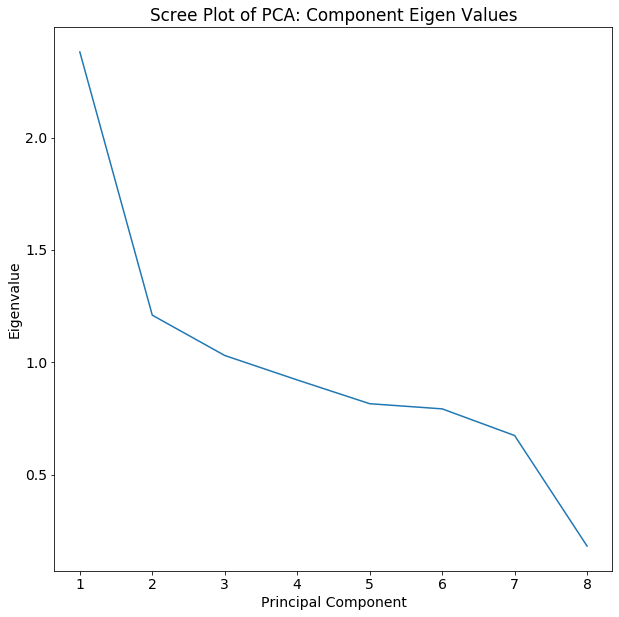

In [133]:
x=range(1,9)
eigen_val=pca.explained_variance_
ax=plt.subplots(figsize=(10,10))
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot of PCA: Component Eigen Values')

plt.plot(x,eigen_val)
print(eigen_val)

[ 29.75  44.86  57.73  69.24  79.43  89.33  97.75 100.02]


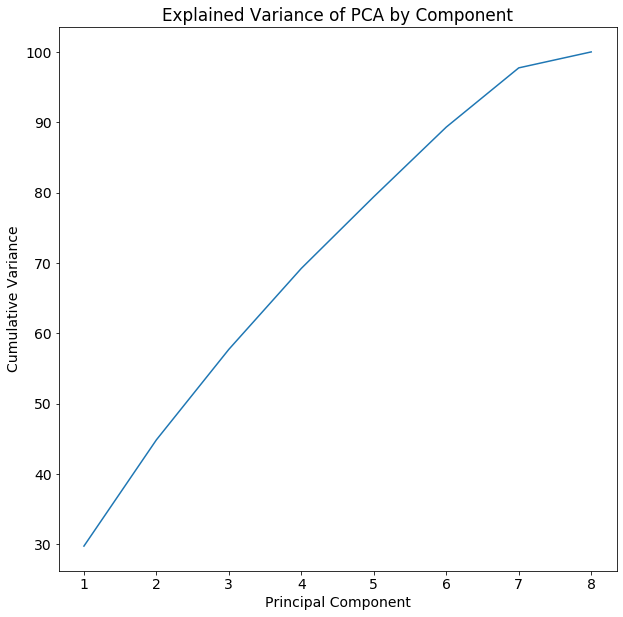

In [134]:
x=range(1,9)
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
ax=plt.subplots(figsize=(10,10))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Explained Variance of PCA by Component')
plt.plot(x,var1)
print(var1)

In [135]:
pca=PCA(n_components=7)
pca.fit(X_std)
x1=pca.fit_transform(X_std)
print(x1)

[[ 2.42494030e+00  6.99272900e-02 -4.21799517e-01 ... -1.63242690e+00
   1.72003978e+00 -1.31394732e+00]
 [-1.05550002e+00  7.31984393e-01 -3.17960350e-01 ... -9.96921124e-04
   9.18143025e-01 -2.25503117e-01]
 [-1.18999808e+00  3.80155369e-01  9.76153403e-01 ... -6.41259431e-01
   3.38441052e-01  1.87687651e-01]
 ...
 [ 8.91215690e-01 -6.40483301e-01  6.50124369e-01 ...  1.69289636e+00
  -3.43790100e-01  2.65844226e-01]
 [-1.75047056e+00 -3.32445799e-01  9.24319345e-01 ...  8.22604562e-01
   1.08493645e-01 -4.61231134e-01]
 [ 2.71566841e+00 -2.21021884e-01 -2.97686778e-01 ...  6.33606270e-01
  -2.50940694e-01 -1.37278518e+00]]


In [136]:
feature1=pd.DataFrame(x1)
feature1.columns = ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5','Component 6','Component 7']
feature1

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7
0,2.424940,0.069927,-0.421800,-0.455347,-1.632427,1.720040,-1.313947
1,-1.055500,0.731984,-0.317960,0.183626,-0.000997,0.918143,-0.225503
2,-1.189998,0.380155,0.976153,-0.897991,-0.641259,0.338441,0.187688
3,-2.030864,-0.433043,-1.172777,0.686669,-0.122032,0.703196,-0.659128
4,-1.069060,1.367073,1.473072,-1.726389,-0.637926,-0.748371,0.894867
...,...,...,...,...,...,...,...
1250,-0.382627,-0.432367,0.078802,-0.466948,0.708203,0.458468,-0.427187
1251,-0.872070,-0.138532,-1.040216,0.626402,0.969035,0.349101,0.024317
1252,0.891216,-0.640483,0.650124,-0.582952,1.692896,-0.343790,0.265844
1253,-1.750471,-0.332446,0.924319,-0.179141,0.822605,0.108494,-0.461231


In [137]:
PC = pca.components_
PC_trans = PC.transpose()
results = pd.DataFrame(PC_trans)
results.columns = ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5','Component 6','Component 7']
results.index=PCAdf.columns
results

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7
age,0.335889,-0.441797,0.202748,-0.232723,-0.391375,0.130320,0.617849
cigsPerDay,-0.122644,0.661026,0.110224,-0.189463,-0.406769,-0.509192,0.273171
totChol,0.238113,-0.017651,0.572325,-0.611771,0.348879,-0.169370,-0.301197
sysBP,0.568049,0.029813,-0.194389,-0.033853,-0.305214,-0.015477,-0.181522
diaBP,0.532959,0.158314,-0.339480,0.002293,-0.113567,-0.062269,-0.349538
BMI,0.368075,0.076115,-0.162109,0.213531,0.643027,-0.357163,0.491884
heartRate,0.195371,0.577695,0.220124,0.048059,0.126731,0.727503,0.178913
glucose,0.187256,-0.045508,0.625636,0.697584,-0.155084,-0.184693,-0.154381


In [138]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,recall_score, confusion_matrix,precision_score ,accuracy_score,f1_score, roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [139]:
from imblearn.metrics import sensitivity_score, specificity_score

Using TensorFlow backend.


# Holdout Reglog

In [140]:
data_bal.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,59,1.0,0,0.0,0.0,0,1,0,246.0,189.0,111.0,19.88,90.0,85.0,1
1,0,45,3.0,1,10.0,0.0,0,0,0,210.0,121.0,82.0,23.08,85.0,71.0,1
2,1,54,2.0,1,20.0,0.0,0,0,0,261.0,117.0,74.0,20.88,80.0,77.0,1
3,0,42,1.0,0,0.0,0.0,0,0,0,170.0,113.0,79.0,21.31,70.0,65.0,1
4,1,56,1.0,1,40.0,0.0,0,0,0,296.0,111.5,74.0,23.38,80.0,71.0,1


In [141]:
X=pd.concat([data_bal.iloc[:,[0,2,3,5,6,7,8]],feature1],axis=1,sort=False)
y=data_bal['TenYearCHD']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [143]:
p_grid = {'C': [0.01 ,0.1, 1],
        'solver': ['newton-cg', 'lbfgs', 'liblinear','sag','saga']}

In [144]:
grid = GridSearchCV(LogisticRegression(),p_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=0.01, solver=newton-cg ........................................
[CV] ......................... C=0.01, solver=newton-cg, total=   0.0s
[CV] C=0.01, solver=newton-cg ........................................
[CV] ......................... C=0.01, solver=newton-cg, total=   0.0s
[CV] C=0.01, solver=newton-cg ........................................
[CV] ......................... C=0.01, solver=newton-cg, total=   0.0s
[CV] C=0.01, solver=newton-cg ........................................
[CV] ......................... C=0.01, solver=newton-cg, total=   0.0s
[CV] C=0.01, solver=newton-cg ........................................
[CV] ......................... C=0.01, solver=newton-cg, total=   0.0s
[CV] C=0.01, solver=lbfgs ............................................
[CV] ............................. C=0.01, solver=lbfgs, total=   0.0s
[CV] C=0.01, solver=lbfgs ............................................
[CV] ...........

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

[CV] .................................. C=1, solver=sag, total=   0.0s
[CV] C=1, solver=sag .................................................
[CV] .................................. C=1, solver=sag, total=   0.0s
[CV] C=1, solver=sag .................................................
[CV] .................................. C=1, solver=sag, total=   0.0s
[CV] C=1, solver=saga ................................................
[CV] ................................. C=1, solver=saga, total=   0.0s
[CV] C=1, solver=saga ................................................
[CV] ................................. C=1, solver=saga, total=   0.0s
[CV] C=1, solver=saga ................................................
[CV] ................................. C=1, solver=saga, total=   0.0s
[CV] C=1, solver=saga ................................................
[CV] ................................. C=1, solver=saga, total=   0.0s
[CV] C=1, solver=saga ................................................
[CV] .

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [145]:
print(grid.best_estimator_)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [146]:
reglog=LogisticRegression(C=0.01,solver='liblinear').fit(X_train, y_train)
reglog_pred=reglog.predict(X_test)

a=reglog.score(X_test, y_test)
print(f"score: {a} ")


acc=accuracy_score(y_test, reglog_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

f1 = f1_score(y_test, reglog_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

precision = precision_score(y_test, reglog_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

recall = recall_score(y_test, reglog_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

sensitiv = sensitivity_score(y_test, reglog_pred)
print(f"The sensitivity score for LogReg is: {round(sensitiv,3)*100}%")

specific = specificity_score(y_test, reglog_pred)
print(f"The specificity score for LogReg is: {round(specific,3)*100}%")

score22 = roc_auc_score(y_test,reglog.predict(X_test))
print('ROC AUC score:',score22)

score: 0.6428571428571429 
The accuracy score for LogReg is: 64.3%
The f1 score for LogReg is: 68.5%
The precision score for LogReg is: 69.0%
The recall score for LogReg is: 68.10000000000001%
The sensitivity score for LogReg is: 68.10000000000001%
The specificity score for LogReg is: 59.3%
ROC AUC score: 0.636574074074074


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

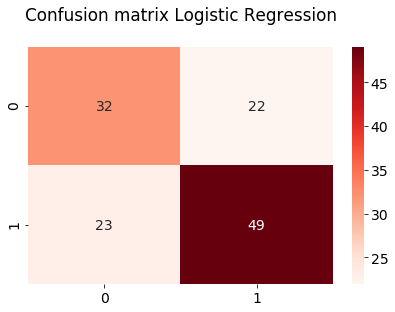

In [147]:
cnf_matrix_log = confusion_matrix(y_test, reglog_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

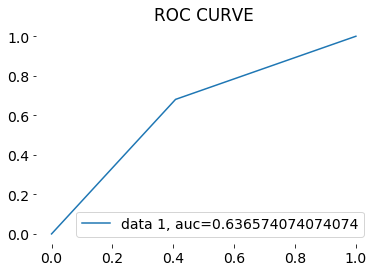

In [148]:
fpr, tpr, _ = roc_curve(y_test, reglog_pred)
auc = roc_auc_score(y_test, reglog_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE')
plt.show()


# Repeated Holdout

0 of 10
accuracy: 64.3%
The f1 score for LogReg is: 68.5%
The precision score for LogReg is: 69.0%
The recall score for LogReg is: 68.10000000000001%
The sensitivity score for LogReg is: 68.10000000000001%
The specificity score for LogReg is: 59.3%
Confusion matrix
 [[32 22]
 [23 49]]
ROC AUC score: 0.636574074074074
 
1 of 10
accuracy: 65.9%
The f1 score for LogReg is: 65.0%
The precision score for LogReg is: 57.99999999999999%
The recall score for LogReg is: 74.1%
The sensitivity score for LogReg is: 74.1%
The specificity score for LogReg is: 59.699999999999996%
Confusion matrix
 [[43 29]
 [14 40]]
ROC AUC score: 0.6689814814814814
 
2 of 10
accuracy: 69.0%
The f1 score for LogReg is: 71.5%
The precision score for LogReg is: 73.1%
The recall score for LogReg is: 70.0%
The sensitivity score for LogReg is: 70.0%
The specificity score for LogReg is: 67.9%
Confusion matrix
 [[38 18]
 [21 49]]
ROC AUC score: 0.6892857142857144
 
3 of 10
accuracy: 65.9%
The f1 score for LogReg is: 66.7%
Th

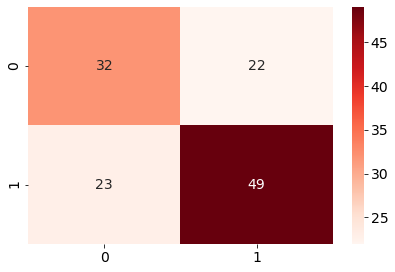

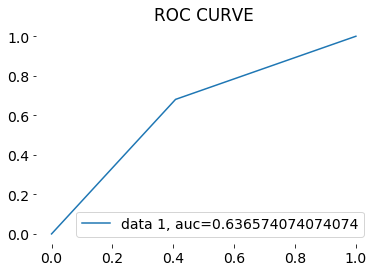

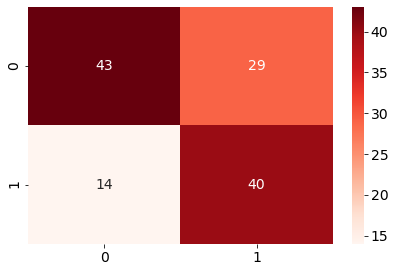

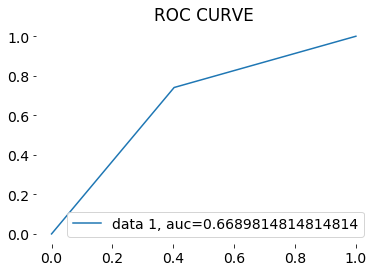

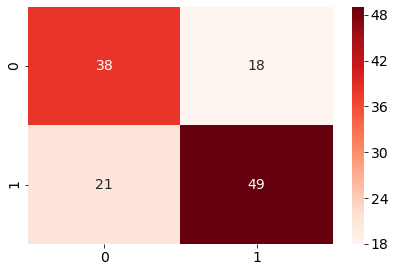

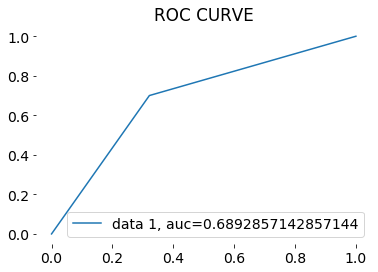

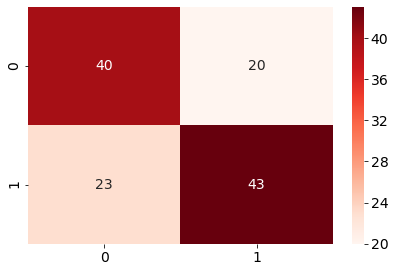

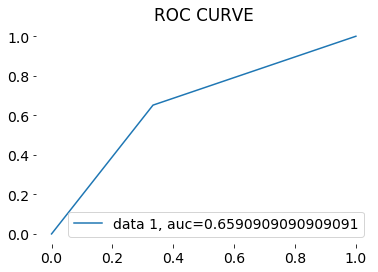

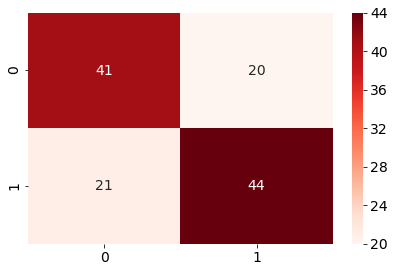

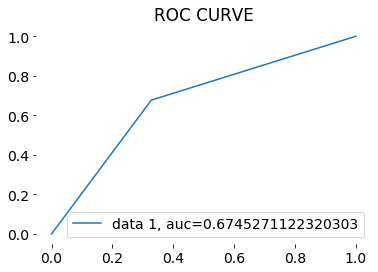

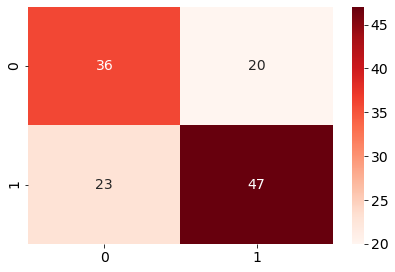

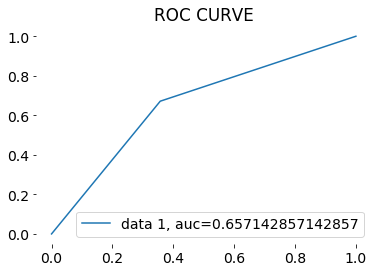

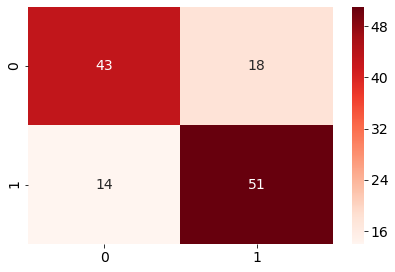

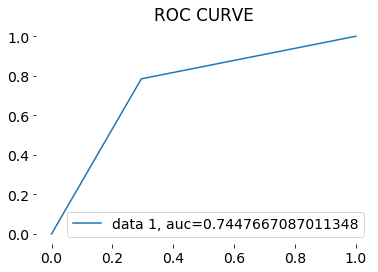

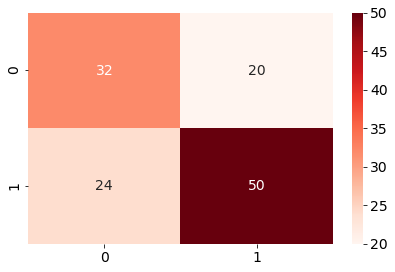

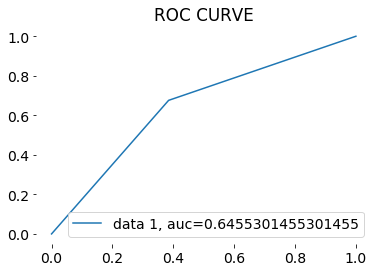

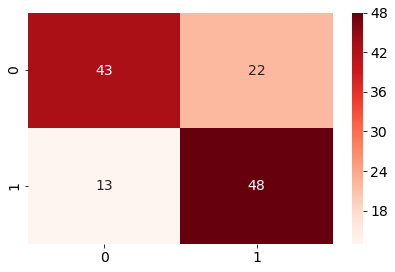

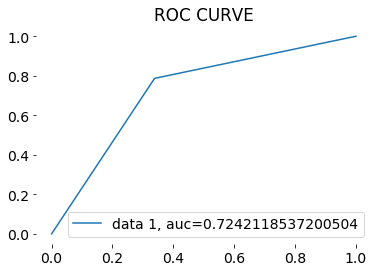

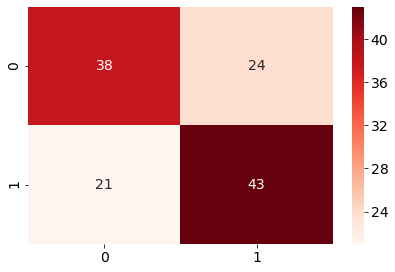

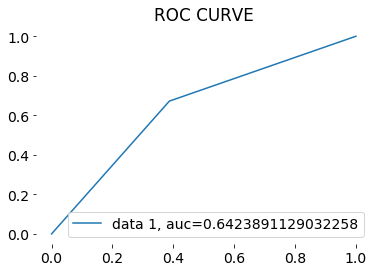

In [149]:
randhold=10
pred_test_full =0
cv_score =[]
for i in range(randhold):
    xtr, xvl, ytr, yvl = train_test_split(X, y, test_size=0.1, random_state=42+2*(i))
    print('{} of {}'.format(i,randhold))
    lrr = LogisticRegression(C=0.01,solver='liblinear')
    lrr.fit(xtr,ytr)
    acc=accuracy_score(yvl,lrr.predict(xvl))
    print(f"accuracy: {round(acc,3)*100}%")
    f1 = f1_score(yvl,lrr.predict(xvl))
    print(f"The f1 score for LogReg is: {round(f1,3)*100}%")
    precision = precision_score(yvl,lrr.predict(xvl))
    print(f"The precision score for LogReg is: {round(precision,3)*100}%")
    recall = recall_score(yvl,lrr.predict(xvl))
    print(f"The recall score for LogReg is: {round(recall,3)*100}%")
    sensitiv = sensitivity_score(yvl, lrr.predict(xvl))
    print(f"The sensitivity score for LogReg is: {round(sensitiv,3)*100}%")
    specific = specificity_score(yvl, lrr.predict(xvl))
    print(f"The specificity score for LogReg is: {round(specific,3)*100}%")
    score = roc_auc_score(yvl,lrr.predict(xvl))
    print('Confusion matrix\n',confusion_matrix(yvl,lrr.predict(xvl)))
    plt.figure()
    cnf_matrix_log = confusion_matrix(yvl, lrr.predict(xvl))
    sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
    plt.tight_layout()
    plt.figure()
    fpr, tpr, _ = roc_curve(yvl, lrr.predict(xvl))
    auc = roc_auc_score(yvl, lrr.predict(xvl))
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.box(False)
    plt.title ('ROC CURVE')
    print('ROC AUC score:',score)
    print(' ')
    
    cv_score.append(score)    
    pred_test = lrr.predict_proba(X_test)[:,1]
    pred_test_full+=pred_test
    
    

In [150]:
print('Confusion matrix\n',confusion_matrix(yvl,lrr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[38 24]
 [21 43]]
Cv [0.636574074074074, 0.6689814814814814, 0.6892857142857144, 0.6590909090909091, 0.6745271122320303, 0.657142857142857, 0.7447667087011348, 0.6455301455301455, 0.7242118537200504, 0.6423891129032258] 
Mean cv Score 0.6742499969161623


In [151]:
lrr.coef_

array([[ 0.18920478, -0.04280547,  0.01630583,  0.05268147,  0.0294899 ,
         0.13601997,  0.0380507 ,  0.35886698, -0.04930837,  0.13688883,
        -0.10653572, -0.26373235, -0.08910661,  0.1852037 ]])

In [152]:
lrr.score(xvl,yvl)

0.6428571428571429

# Stratified Kfold reglog

1 of KFold 10
accuracy: 66.7%
The f1 score for LogReg is: 68.2%
The precision score for LogReg is: 67.2%
The recall score for LogReg is: 69.19999999999999%
The sensitivity score for LogReg is: 69.19999999999999%
The specificity score for LogReg is: 63.9%
Confusion matrix
 [[39 22]
 [20 45]]
ROC AUC score: 0.6658259773013872
 
2 of KFold 10
accuracy: 65.9%
The f1 score for LogReg is: 66.10000000000001%
The precision score for LogReg is: 67.7%
The recall score for LogReg is: 64.60000000000001%
The sensitivity score for LogReg is: 64.60000000000001%
The specificity score for LogReg is: 67.2%
Confusion matrix
 [[41 20]
 [23 42]]
ROC AUC score: 0.6591424968474149
 
3 of KFold 10
accuracy: 68.30000000000001%
The f1 score for LogReg is: 71.0%
The precision score for LogReg is: 67.10000000000001%
The recall score for LogReg is: 75.4%
The sensitivity score for LogReg is: 75.4%
The specificity score for LogReg is: 60.699999999999996%
Confusion matrix
 [[37 24]
 [16 49]]
ROC AUC score: 0.68020176

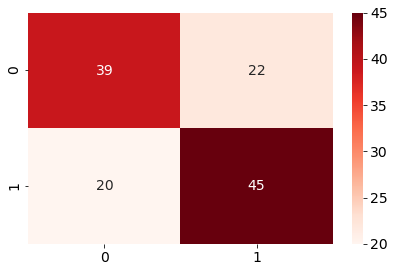

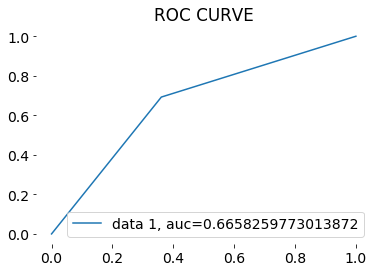

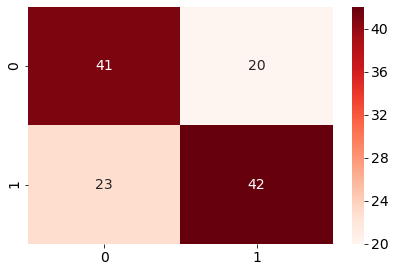

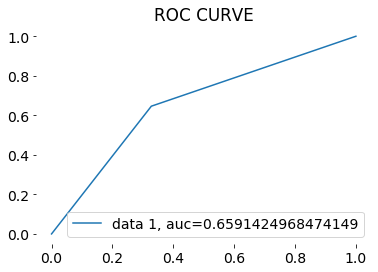

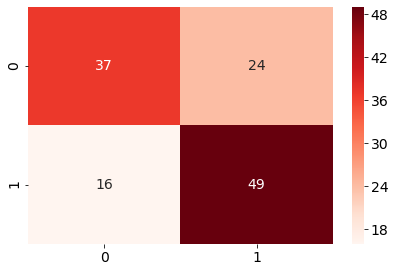

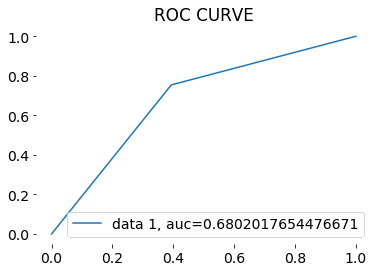

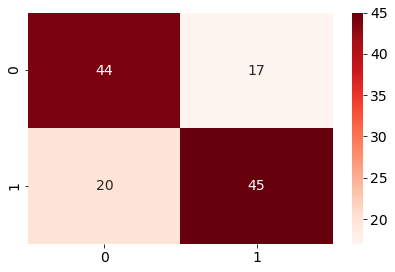

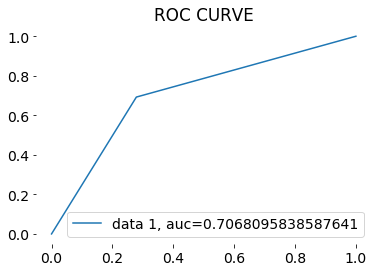

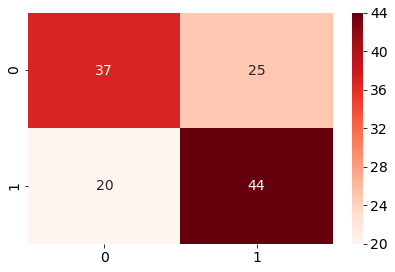

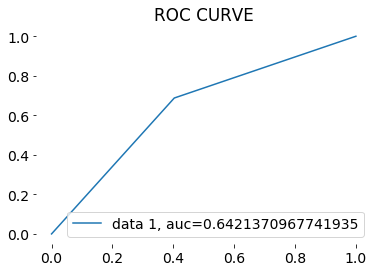

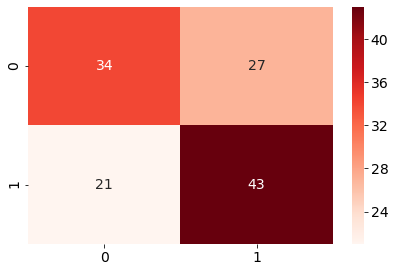

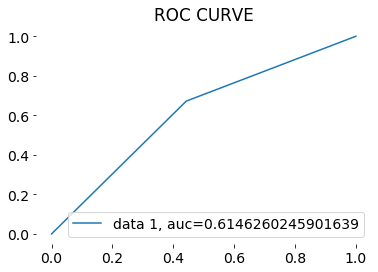

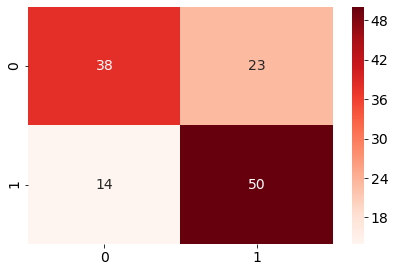

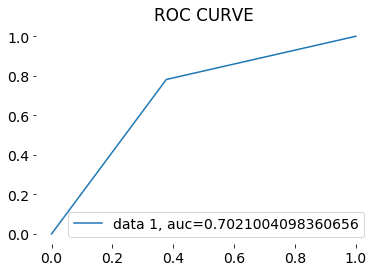

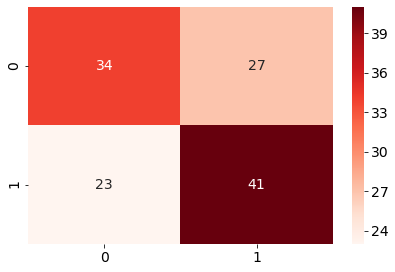

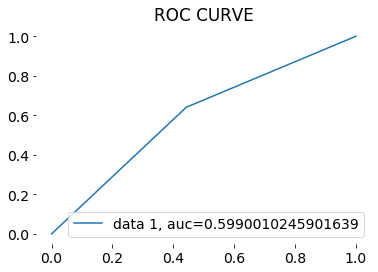

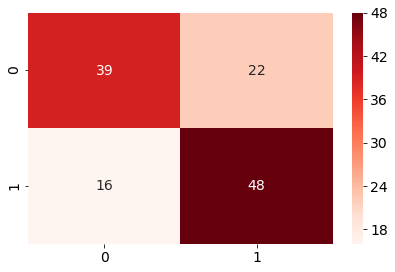

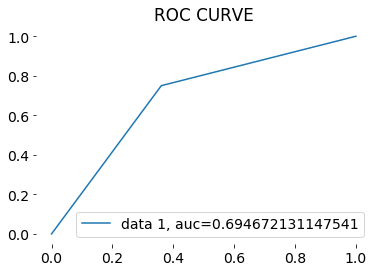

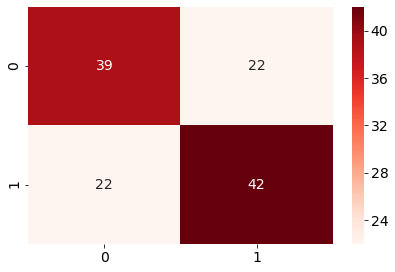

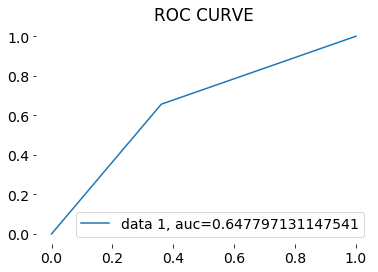

In [153]:
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
pred_test_full =0
cv_score =[]
i=1

for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    lr = LogisticRegression(C=0.01,solver='liblinear')
    lr.fit(xtr,ytr)
    acc=accuracy_score(yvl,lr.predict(xvl))
    print(f"accuracy: {round(acc,3)*100}%")
    f1 = f1_score(yvl,lr.predict(xvl))
    print(f"The f1 score for LogReg is: {round(f1,3)*100}%")
    precision = precision_score(yvl,lr.predict(xvl))
    print(f"The precision score for LogReg is: {round(precision,3)*100}%")
    recall = recall_score(yvl,lr.predict(xvl))
    print(f"The recall score for LogReg is: {round(recall,3)*100}%")
    sensitiv = sensitivity_score(yvl, lr.predict(xvl))
    print(f"The sensitivity score for LogReg is: {round(sensitiv,3)*100}%")
    specific = specificity_score(yvl, lr.predict(xvl))
    print(f"The specificity score for LogReg is: {round(specific,3)*100}%")
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
    plt.figure()
    cnf_matrix_log = confusion_matrix(yvl, lr.predict(xvl))
    sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
    plt.tight_layout()
    
    plt.figure()
    fpr, tpr, _ = roc_curve(yvl, lr.predict(xvl))
    auc = roc_auc_score(yvl, lr.predict(xvl))
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.box(False)
    plt.title ('ROC CURVE')
    
    print('ROC AUC score:',score)
    print(' ')
    
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1
    

In [154]:
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[39 22]
 [22 42]]
Cv [0.6658259773013872, 0.6591424968474149, 0.6802017654476671, 0.7068095838587641, 0.6421370967741935, 0.6146260245901639, 0.7021004098360656, 0.5990010245901639, 0.694672131147541, 0.647797131147541] 
Mean cv Score 0.6612313641540902


In [155]:
lr.coef_

array([[ 0.19743532, -0.04775977,  0.03962938,  0.0692274 ,  0.03094692,
         0.14876053,  0.0512643 ,  0.36629764, -0.01922826,  0.17505282,
        -0.11177294, -0.23318105, -0.07799383,  0.18392272]])

In [156]:
lr.score(xvl,yvl)

0.648

# Holdout D Tree

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [158]:
p_grid = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
        'max_features': [15 ,'auto', 'sqrt','log2']}

In [159]:
grid = GridSearchCV(DecisionTreeClassifier(),p_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] criterion=gini, max_features=15, splitter=best ..................
[CV] ... criterion=gini, max_features=15, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=15, splitter=best ..................
[CV] ... criterion=gini, max_features=15, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=15, splitter=best ..................
[CV] ... criterion=gini, max_features=15, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=15, splitter=best ..................
[CV] ... criterion=gini, max_features=15, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=15, splitter=best ..................
[CV] ... criterion=gini, max_features=15, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=15, splitter=random ................
[CV] . criterion=gini, max_features=15, splitter=random, total=   0.0s
[CV] criterion=gini, max_features=15, splitter=random ................
[CV] . criterion

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_fea

[CV] . criterion=gini, max_features=log2, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=log2, splitter=best ................
[CV] . criterion=gini, max_features=log2, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=log2, splitter=best ................
[CV] . criterion=gini, max_features=log2, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=log2, splitter=best ................
[CV] . criterion=gini, max_features=log2, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=log2, splitter=best ................
[CV] . criterion=gini, max_features=log2, splitter=best, total=   0.0s
[CV] criterion=gini, max_features=log2, splitter=random ..............
[CV]  criterion=gini, max_features=log2, splitter=random, total=   0.0s
[CV] criterion=gini, max_features=log2, splitter=random ..............
[CV]  criterion=gini, max_features=log2, splitter=random, total=   0.0s
[CV] criterion=gini, max_features=log2, splitter=random ..............
[CV]

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The sco

[CV]  criterion=entropy, max_features=sqrt, splitter=random, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, splitter=random ...........
[CV]  criterion=entropy, max_features=sqrt, splitter=random, total=   0.0s
[CV] criterion=entropy, max_features=sqrt, splitter=random ...........
[CV]  criterion=entropy, max_features=sqrt, splitter=random, total=   0.0s
[CV] criterion=entropy, max_features=log2, splitter=best .............
[CV]  criterion=entropy, max_features=log2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_features=log2, splitter=best .............
[CV]  criterion=entropy, max_features=log2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_features=log2, splitter=best .............
[CV]  criterion=entropy, max_features=log2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_features=log2, splitter=best .............
[CV]  criterion=entropy, max_features=log2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_features=log2, splitter=best 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [160]:
print(grid.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')


In [161]:
dtree=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features='log2').fit(X_train, y_train)
dtree_pred=dtree.predict(X_test)

a=dtree.score(X_test, y_test)
print(f"score: {a} ")


acc=accuracy_score(y_test, dtree_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

f1 = f1_score(y_test, dtree_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

precision = precision_score(y_test, dtree_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

recall = recall_score(y_test, dtree_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

sensitiv = sensitivity_score(y_test, dtree_pred)
print(f"The sensitivity score for LogReg is: {round(sensitiv,3)*100}%")
specific = specificity_score(y_test, dtree_pred)
print(f"The specificity score for LogReg is: {round(specific,3)*100}%")

score22 = roc_auc_score(y_test,dtree.predict(X_test))
print('ROC AUC score:',score22)

score: 0.6190476190476191 
The accuracy score for LogReg is: 61.9%
The f1 score for LogReg is: 67.10000000000001%
The precision score for LogReg is: 66.2%
The recall score for LogReg is: 68.10000000000001%
The sensitivity score for LogReg is: 68.10000000000001%
The specificity score for LogReg is: 53.7%
ROC AUC score: 0.6087962962962963


Text(0.5, 1.1, 'Confusion matrix decision tree\n')

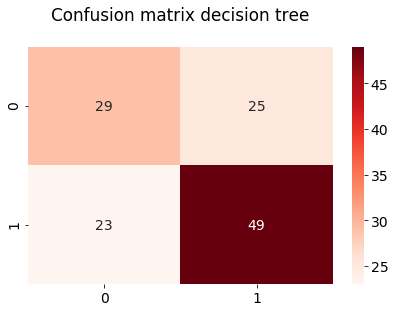

In [162]:
cnf_matrix_tree = confusion_matrix(y_test, dtree_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_tree), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix decision tree\n', y=1.1)

Text(0.5, 1.0, 'ROC CURVE')

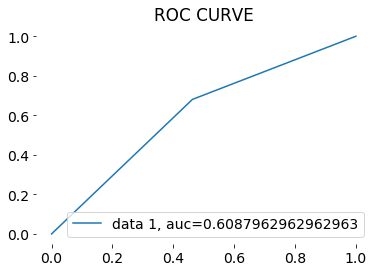

In [163]:
plt.figure()
fpr, tpr, _ = roc_curve(y_test, dtree_pred)
auc = roc_auc_score(y_test, dtree_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE')

# Repeated Holdout D tree

0 of 10
accuracy: 61.9%
The f1 score for LogReg is: 66.7%
The precision score for LogReg is: 66.7%
The recall score for LogReg is: 66.7%
The sensitivity score for LogReg is: 66.7%
The specificity score for LogReg is: 55.60000000000001%
Confusion matrix
 [[30 24]
 [24 48]]
ROC AUC score: 0.6319444444444444
 
1 of 10
accuracy: 57.099999999999994%
The f1 score for LogReg is: 58.5%
The precision score for LogReg is: 50.0%
The recall score for LogReg is: 70.39999999999999%
The sensitivity score for LogReg is: 70.39999999999999%
The specificity score for LogReg is: 47.199999999999996%
Confusion matrix
 [[34 38]
 [16 38]]
ROC AUC score: 0.6597222222222223
 
2 of 10
accuracy: 56.3%
The f1 score for LogReg is: 58.599999999999994%
The precision score for LogReg is: 61.9%
The recall score for LogReg is: 55.7%
The sensitivity score for LogReg is: 55.7%
The specificity score for LogReg is: 57.099999999999994%
Confusion matrix
 [[32 24]
 [31 39]]
ROC AUC score: 0.7196428571428571
 
3 of 10
accuracy:

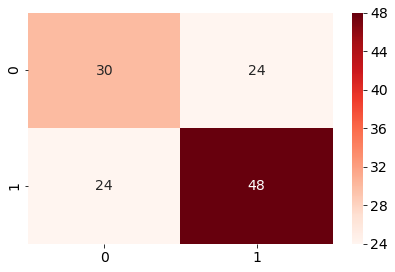

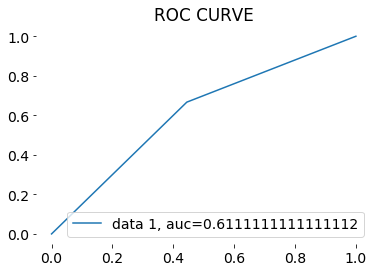

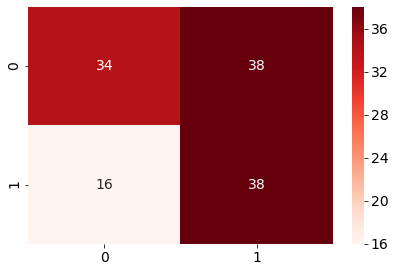

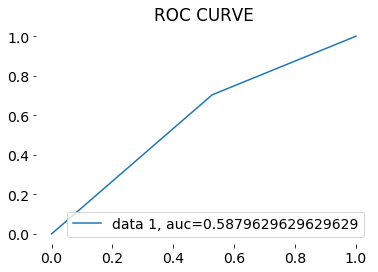

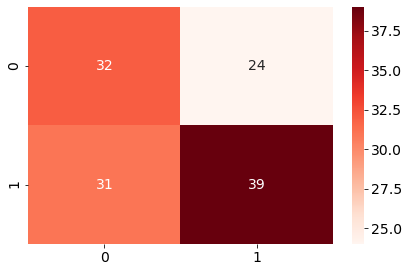

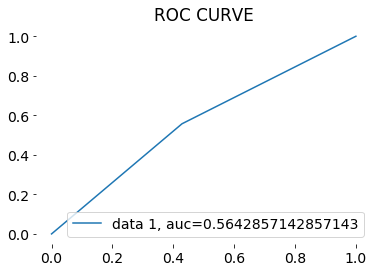

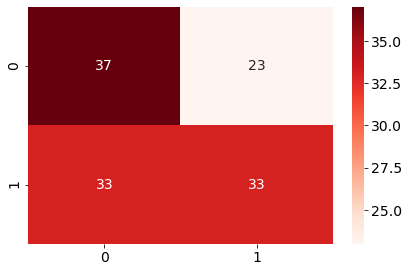

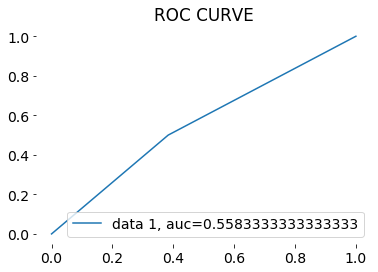

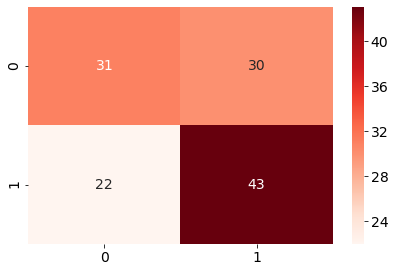

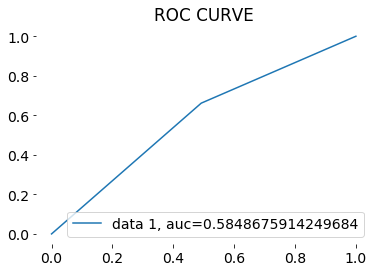

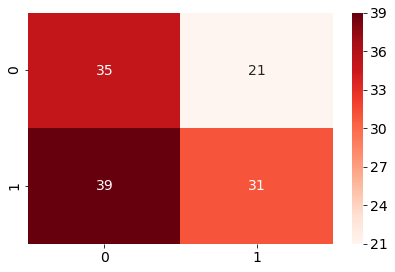

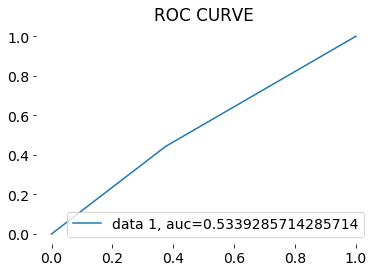

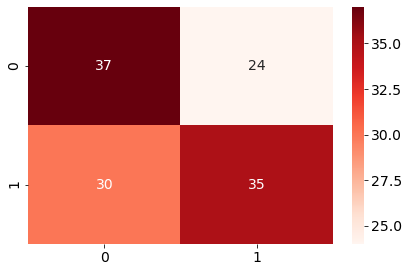

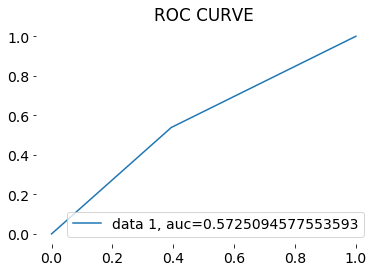

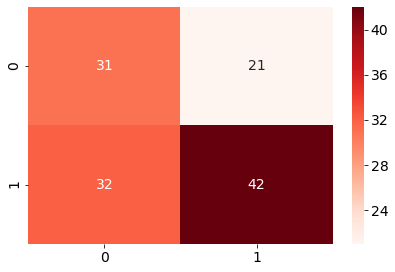

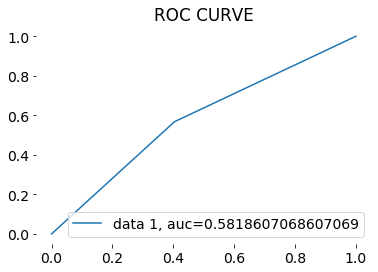

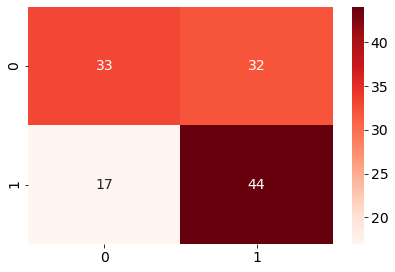

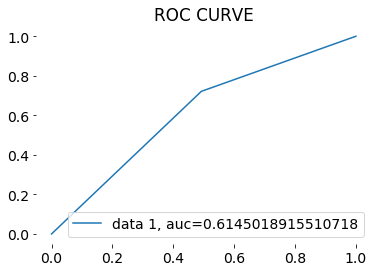

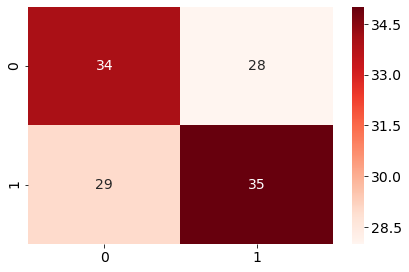

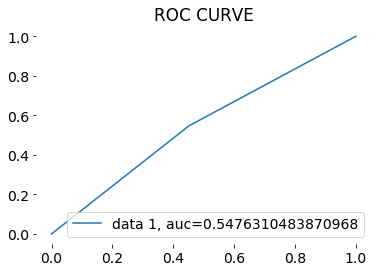

In [164]:
randhold=10
pred_test_full =0
cv_score =[]
for i in range(randhold):
    xtr, xvl, ytr, yvl = train_test_split(X, y, test_size=0.1, random_state=42+2*(i))
    print('{} of {}'.format(i,randhold))
    dtt = DecisionTreeClassifier(criterion='entropy',splitter='best',max_features='log2')
    dtt.fit(xtr,ytr)
    acc=accuracy_score(yvl,dtt.predict(xvl))
    print(f"accuracy: {round(acc,3)*100}%")
    f1 = f1_score(yvl,dtt.predict(xvl))
    print(f"The f1 score for LogReg is: {round(f1,3)*100}%")
    precision = precision_score(yvl,dtt.predict(xvl))
    print(f"The precision score for LogReg is: {round(precision,3)*100}%")
    recall = recall_score(yvl,dtt.predict(xvl))
    print(f"The recall score for LogReg is: {round(recall,3)*100}%")
    sensitiv = sensitivity_score(yvl, dtt.predict(xvl))
    print(f"The sensitivity score for LogReg is: {round(sensitiv,3)*100}%")
    specific = specificity_score(yvl, dtt.predict(xvl))
    print(f"The specificity score for LogReg is: {round(specific,3)*100}%")
    score = roc_auc_score(yvl,lrr.predict(xvl))
    print('Confusion matrix\n',confusion_matrix(yvl,dtt.predict(xvl)))
    plt.figure()
    cnf_matrix_log = confusion_matrix(yvl, dtt.predict(xvl))
    sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
    plt.tight_layout()
    plt.figure()
    fpr, tpr, _ = roc_curve(yvl, dtt.predict(xvl))
    auc = roc_auc_score(yvl, dtt.predict(xvl))
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.box(False)
    plt.title ('ROC CURVE')
    print('ROC AUC score:',score)
    print(' ')
    
    cv_score.append(score)    
    pred_test = dtt.predict_proba(X_test)[:,1]
    pred_test_full+=pred_test

In [165]:
print('Confusion matrix\n',confusion_matrix(yvl,dtt.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[34 28]
 [29 35]]
Cv [0.6319444444444444, 0.6597222222222223, 0.7196428571428571, 0.6590909090909091, 0.6740226986128626, 0.6642857142857143, 0.7447667087011348, 0.633056133056133, 0.7395964691046658, 0.6423891129032258] 
Mean cv Score 0.6768517269564169


In [166]:
dtt.score(xvl,yvl)

0.5476190476190477

# Stratified Kfold CV D tree

1 of KFold 10
accuracy: 56.3%
The f1 score for LogReg is: 61.5%
The precision score for LogReg is: 56.39999999999999%
The recall score for LogReg is: 67.7%
The sensitivity score for LogReg is: 67.7%
The specificity score for LogReg is: 44.3%
Confusion matrix
 [[27 34]
 [21 44]]
ROC AUC score: 0.5597730138713746
 
2 of KFold 10
accuracy: 53.2%
The f1 score for LogReg is: 59.3%
The precision score for LogReg is: 53.800000000000004%
The recall score for LogReg is: 66.2%
The sensitivity score for LogReg is: 66.2%
The specificity score for LogReg is: 39.300000000000004%
Confusion matrix
 [[24 37]
 [22 43]]
ROC AUC score: 0.5274905422446405
 
3 of KFold 10
accuracy: 60.3%
The f1 score for LogReg is: 63.2%
The precision score for LogReg is: 60.6%
The recall score for LogReg is: 66.2%
The sensitivity score for LogReg is: 66.2%
The specificity score for LogReg is: 54.1%
Confusion matrix
 [[33 28]
 [22 43]]
ROC AUC score: 0.6012610340479192
 
4 of KFold 10
accuracy: 51.6%
The f1 score for LogReg

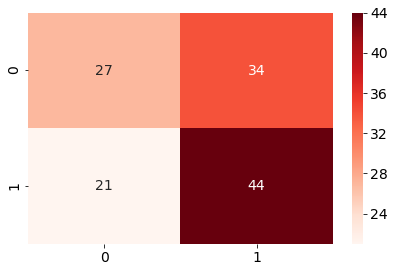

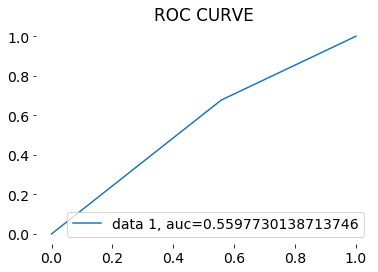

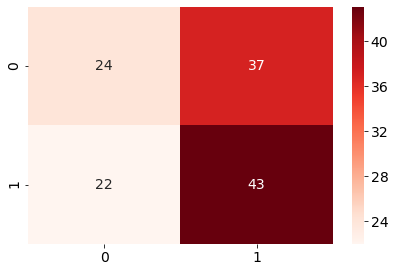

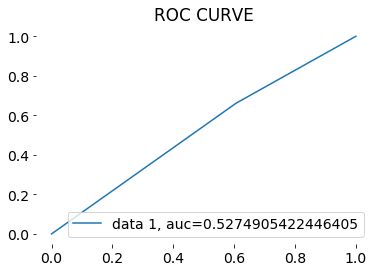

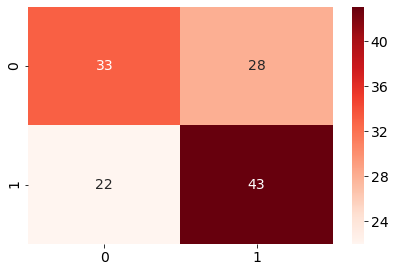

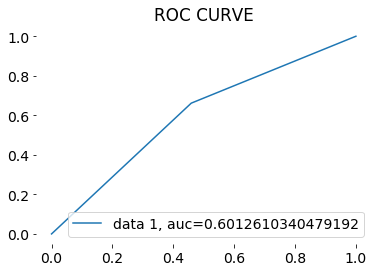

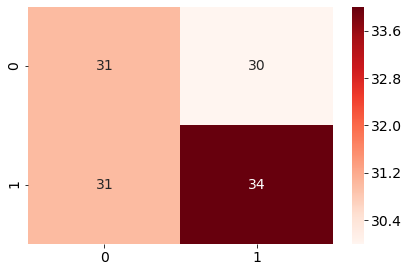

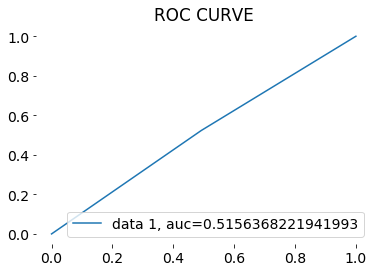

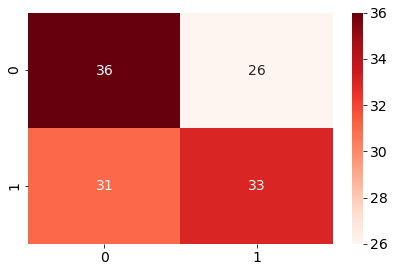

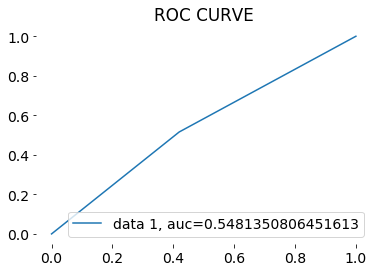

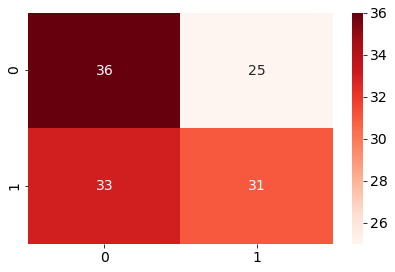

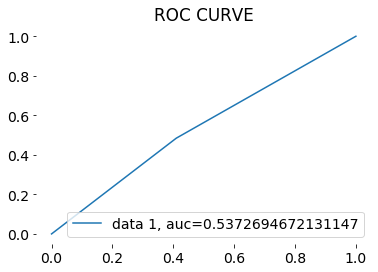

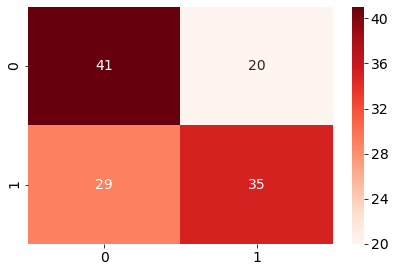

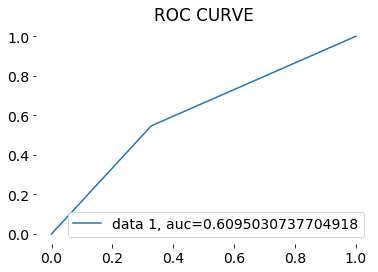

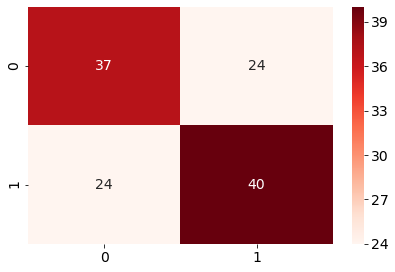

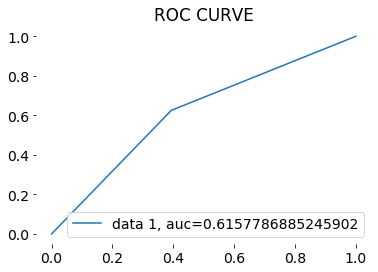

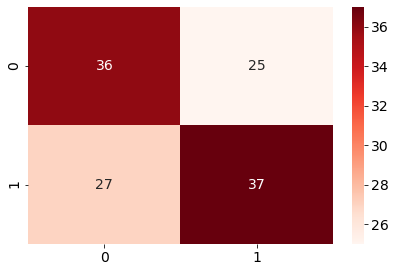

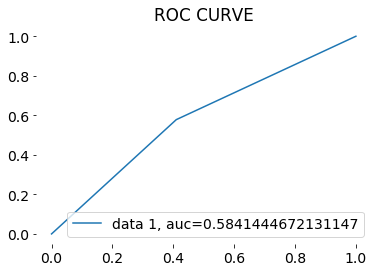

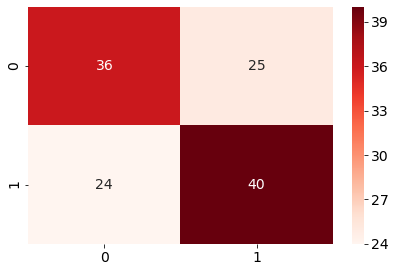

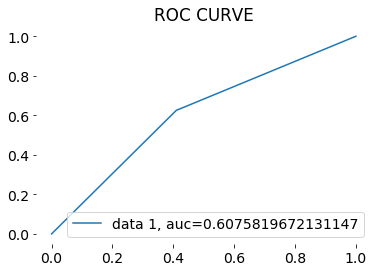

In [167]:
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
pred_test_full =0
cv_score =[]
i=1

for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    dt = DecisionTreeClassifier(criterion='entropy',splitter='best',max_features='log2')
    dt.fit(xtr,ytr)
    acc=accuracy_score(yvl,dt.predict(xvl))
    print(f"accuracy: {round(acc,3)*100}%")
    f1 = f1_score(yvl,dt.predict(xvl))
    print(f"The f1 score for LogReg is: {round(f1,3)*100}%")
    precision = precision_score(yvl,dt.predict(xvl))
    print(f"The precision score for LogReg is: {round(precision,3)*100}%")
    recall = recall_score(yvl,dt.predict(xvl))
    print(f"The recall score for LogReg is: {round(recall,3)*100}%")
    sensitiv = sensitivity_score(yvl, dt.predict(xvl))
    print(f"The sensitivity score for LogReg is: {round(sensitiv,3)*100}%")
    specific = specificity_score(yvl, dt.predict(xvl))
    print(f"The specificity score for LogReg is: {round(specific,3)*100}%")
    print('Confusion matrix\n',confusion_matrix(yvl,dt.predict(xvl)))
    plt.figure()
    cnf_matrix_log = confusion_matrix(yvl, dt.predict(xvl))
    sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
    plt.tight_layout()
    plt.figure()
    fpr, tpr, _ = roc_curve(yvl, dt.predict(xvl))
    auc = roc_auc_score(yvl, dt.predict(xvl))
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.box(False)
    plt.title ('ROC CURVE')
    score = roc_auc_score(yvl,dt.predict(xvl))
    print('ROC AUC score:',score)
    print(' ')
    
    cv_score.append(score)    
    pred_test = dt.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

In [168]:
print('Confusion matrix\n',confusion_matrix(yvl,dt.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[36 25]
 [24 40]]
Cv [0.5597730138713746, 0.5274905422446405, 0.6012610340479192, 0.5156368221941993, 0.5481350806451613, 0.5372694672131147, 0.6095030737704918, 0.6157786885245902, 0.5841444672131147, 0.6075819672131147] 
Mean cv Score 0.5706574156937722


In [169]:
dt.score(xvl,yvl)

0.608